<center>

# **Predicting Student Enrollment on Udemy**
##### Module: MSIN0143 Programming for Business Analytics
##### Group Name: *P4BA K2*

###### Word Count: 2000/2000 Words

---


</center>

| Student Name                 | Student ID     |
| ---------------------------- | -------------- |
| Azizah Fathiyah Din          | 24110665
| Jiayi He                     | 23226255
| Pratham Shaileshkumar Kamble | 24150659
| Ruhani Sehgal                | 24204715

\pagebreak

# Table of Contents
* [Introduction](#Introduction)
    * [Problem Statement](#Problem-Statement)
    * [Objective](#Objective)
    * [Data](#Data)
        * [Importing Libraries](#Importing-Libraries)
        * [Importing Dataset](#Importing-Dataset)
* [Data Preparation](#Data-Preparation)
    * [Finding Missing Values](#Finding-Missing-Values)
    * [Cleaning Variable](#Cleaning-variables)
    * [Outlier Analysis](#Outlier-Analysis)
        * [Handling Outliers](#Handling-outliers)
    * [Feature-Engineering](#Feature-Engineering)
        * [Encoding Category, Language, and Course Instructional (Difficulty) Level](#Encoding-category,-language,-and-course-instructional-(difficulty)-level)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis-(EDA))
    * [Descriptive Analysis](#Descriptive-Analysis)
    * [Correlation Studies and Feature Selection](#Correlation-Studies-and-Feature-Selection)
* [Models](#Models)
    * [Model Selection and Training](#Model-Selection-and-Training)
    * [Limitations](#Limitation)
* [Conclusion and Business Recommendations](#Conclusion-and-Business-Recommendations)
    * [Business-Recommendations](#Business-Recommendations)
    * [Next Steps](#Next-Steps)
    * [Conclusion](#Conclusion)
* [References](#References)
* [Appendices](#Appendices)
    * [Gen-AI Usage](#Gen-AI-Usage)
    * [Attribution Contribution](#Attribution-Contribution)
    * [Trello Images](#Trello-Images)
    * [Other Models](#Other-Models)

# Introduction

## Problem Statement

The education sector has undergone a significant shift in recent years, with e-learning platforms emerging as one of the most notable transformations, a change accelerated by the COVID-19 pandemic. These platforms have made education more accessible to a diverse range of individuals, from busy office workers and low-income groups to students seeking supplementary materials. Today, e-learning has become a central component of the educational ecosystem, attracting numerous players to the industry. Among them is Udemy, a leading platform founded in 2010 that offers access to over 250,000 courses. Platforms like Udemy benefit from indirect network effects, where the value of the platform increases as more users join, which in turn attracts more instructors, further enhancing the platform's value. In Udemy’s case, the two key groups are users and instructors. To strengthen its position in the industry, Udemy must continue to attract more instructors to create courses. To support this goal, we have developed a predictive model that estimates the number of students likely to enroll in a course an instructor wants to offer based on the course and instructors’ characteristics. The ultimate objective of this analysis is to create a more transparent and encouraging environment for Udemy instructors, fostering growth on the platform and optimizing revenue.

## Objective

The objective of this report is to identify the factors that predict the number of students likely to enrol in courses offered by Udemy instructors, enabling instructors to analyse trends and identify opportunities. Our analysis focuses specifically on data and business analytics courses, as they are highly relevant in today’s market. Narrowing the scope to these courses also makes the analysis and model development more manageable. 

The report begins with data cleaning and processing to ensure the accuracy and quality of the data. We then explore and analyse the relevant features before developing several predictive models to estimate student enrollment based on these factors. Finally, we present the model that performs best, along with actionable business recommendations.


## Data

The data was collected on November 3rd, 2024, using Webscraper.io, a tool for extracting structured data from websites. It was configured to capture relevant course and instructor information from Udemy's listings.


We focused our web scraping efforts on a curated selection of topics to ensure relevance and manageability. The targeted topics included:

                              Table 1. Scraped topics
|                         |                    |                      |
| ----------------------- | ------------------ | -------------------- |
| machine-learning        | web-development    | python               |
| data-science            | unity              | c-sharp              |
| artificial-intelligence | google-flutter     | javascript           |
| data-analysis           | sql                | java                 |
| generative-ai           | microsoft-power-bi | c-plus-plus          |
| business-intelligence   | unreal-engine      | angular              |
| business-analytics      | game-development   | css                  |
| deep-learning           | docker             | react                |
| data-modeling           | tableau            | dax                  |
| business-analysis       |                    |



During the data collection process, we encountered several challenges that impacted data accuracy and completeness. Network errors and missing values were sometimes observed, likely due to issues capturing JavaScript-rendered content. Additionally, Webscraper.io offers features such as request intervals and page load delays, which we optimized to control the scraper’s operation. Despite our efforts to fine-tune these settings for optimal data extraction, some content occasionally did not load within the specified time frame, resulting in skipped data.

#### Importing Libraries

In [1]:
%%capture
!pip install plotly
!pip install missingno
!pip install statsmodels

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re

#### Importing Dataset

In [1]:
# Load the CSV file
file_path = "https://www.dropbox.com/scl/fi/t8wo7bkxe0v5e5pvre0r5/courses_latest_scrape.csv?rlkey=r6yqrxfeklhiz9nlyq9mkcncj&st=04ooqy4o&dl=1"
df = pd.read_csv(file_path)


NameError: name 'pd' is not defined

In [4]:
# to change display format of floats and not use scientific notation if a feature contains very large number
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
df.head()

,web-scraper-order,web-scraper-start-url,course-title,course-price,course-rating,course-num-of-reviews,course-total-hour-length,course-num-of-lectures,course-instructional-level,course-short-description,...,course-link-href,course-instructor,course-language,course-enrolled-student,instructor_rating,instructor_reviews_count,instructor_students_count,instructor_courses_count,course_languages,raw_stat_texts
0,1730671154-1,https://www.udemy.com/topic/dax/?p=5,Power BI: Introducción a funciones DAXAprende ...,NaN,Rating: 4.6 out of 5,111 reviews,1.5 total hours,20 lectures,Beginner,Aprende lo más importante para comenzar a util...,...,https://www.udemy.com/course/power-bi-introduc...,José Rafael Escalante,Spanish,"2,431 students",4.6,116,"4,461",NaN,NaN,"['4.6 Instructor Rating', '116 Reviews', '4,46..."
1,1730671154-2,https://www.udemy.com/topic/dax/?p=5,DAX-ın təməl anlayışları kursu (Azərbaycan Dil...,NaN,Rating: 4.4 out of 5,34 reviews,2 total hours,18 lectures,Beginner,Kurs vasitəsilə DAX-ın fundamental anlayışları...,...,https://www.udemy.com/course/dax-n-tml-anlayslar/,Emin Məhərrəmli,Azeri,740 students,4.4,34,743,NaN,NaN,"['4.4 Instructor Rating', '34 Reviews', '743 S..."
2,1730671154-3,https://www.udemy.com/topic/dax/?p=5,Linguagem DAX para iniciantesDAXRating: 3.6 ou...,NaN,Rating: 3.6 out of 5,25 reviews,1 total hour,14 lectures,Beginner,DAX,...,https://www.udemy.com/course/linguagem-dax/,Clayton Dias Santos,NaN,238 alunos,NaN,NaN,NaN,NaN,NaN,[]
3,1730671158-4,https://www.udemy.com/topic/dax/?p=4,"【続】Microsoft Power BI Desktop - 入門講座 ～DAX-""X"" ...",Current price: £29.99,Rating: 4.5 out of 5,235 reviews,3.5 total hours,22 lectures,Beginner,Power BI Desktop、入門編は受講した。もっと知りたいけど、どこから広げていけば...,...,https://www.udemy.com/course/masukawa_036/,マスカワ シゲル,日本語,"1,679人の受講生",4.3,60180,147363,50,NaN,"['4.3 Instructor Rating', '60,180 Reviews', '1..."
4,1730671158-5,https://www.udemy.com/topic/dax/?p=4,【続】Microsoft Power BI Desktop- 入門講座 DAX-TABLE ...,Current price: £22.99,Rating: 3.8 out of 5,202 reviews,3.5 total hours,29 lectures,Beginner,【続】Microsoft Power BI Desktop - 入門講座 ～DAX-TABL...,...,https://www.udemy.com/course/masukawa_038/,マスカワ シゲル,日本語,"1,425人の受講生",4.3,60180,147363,50,NaN,"['4.3 Instructor Rating', '60,180 Reviews', '1..."


# Data Preparation


                             Table 2. The handling of features

| Feature                    | Information                                                                                                  | How We Handled It                                                                                                               |
| -------------------------- | ------------------------------------------------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------- |
| web-scraper-order          | Metadata generated by the scraper to indicate the order of scraping.                                         | Dropped as it was unnecessary for analysis.                                                                                     |
| web-scraper-start-url      | Contains the URL from which the data was scraped, indicating the topic of the course.                        | Used to extract the course topic for categorization.                                                                            |
| course-title               | The title of the course, often with additional information appended.                                         | Dropped, as the course topic from the URL was sufficient for categorization.                                                    |
| course-price               | Price of the course, often missing or marked as free; stored as a string.                                    | Converted string values to numeric. Dropped missing prices                                                                      |
| course-rating              | Average course rating, stored as a string (e.g., "Rating: 4.5 out of 5").                                    | Extracted numeric rating from the string for analysis.                                                                          |
| course-num-of-reviews      | Total number of reviews for the course, stored as a string (e.g., "235 reviews" or "1 review").              | Extracted numeric value and standardized singular/plural differences.                                                           |
| course-total-hour-length   | Duration of the course in hours, stored as a string (e.g., "3.5 total hours").                               | Extracted the numeric value from the string for analysis.                                                                       |
| course-num-of-lectures     | Number of lectures in the course, stored as a string (e.g., "22 lectures").                                  | Extracted numeric value from the string for analysis.                                                                           |
| course-instructional-level | The difficulty level of the course (e.g., Beginner, Intermediate, etc.).                                     | Kept as-is for analysis, categorized into four distinct levels.                                                                 |
| course-short-description   | A brief description of the course content.                                                                   | Dropped due to limited relevance and complexity in processing text data within the project timeline.                            |
| course-link                | A URL leading to the course page.                                                                            | Dropped as it was redundant and unnecessary for the analysis.                                                                   |
| course-link-href           | Another URL leading to the course page.                                                                      | Dropped as it was redundant.                                                                                                    |
| course-instructor          | Name of the instructor(s) for the course.                                                                    | Retained the name of the first listed instructor, noting the potential bias in excluding secondary instructors.                 |
| course-language            | Language of the course.                                                                                      | Retained for analysis as a categorical variable.                                                                                |
| course-enrolled-student    | Number of students currently enrolled in the course, stored as a localized string (e.g., "1,679人の受講生").      | Extracted numeric values.                                                                                                       |
| raw_stat_texts             | Contains instructor-related statistics (e.g., rating, reviews, students, courses), often in a single string. | Split into separate columns for each statistic. Only processed data for the first instructor listed. Converted strings to nums. |

## Finding Missing Values

<Axes: >

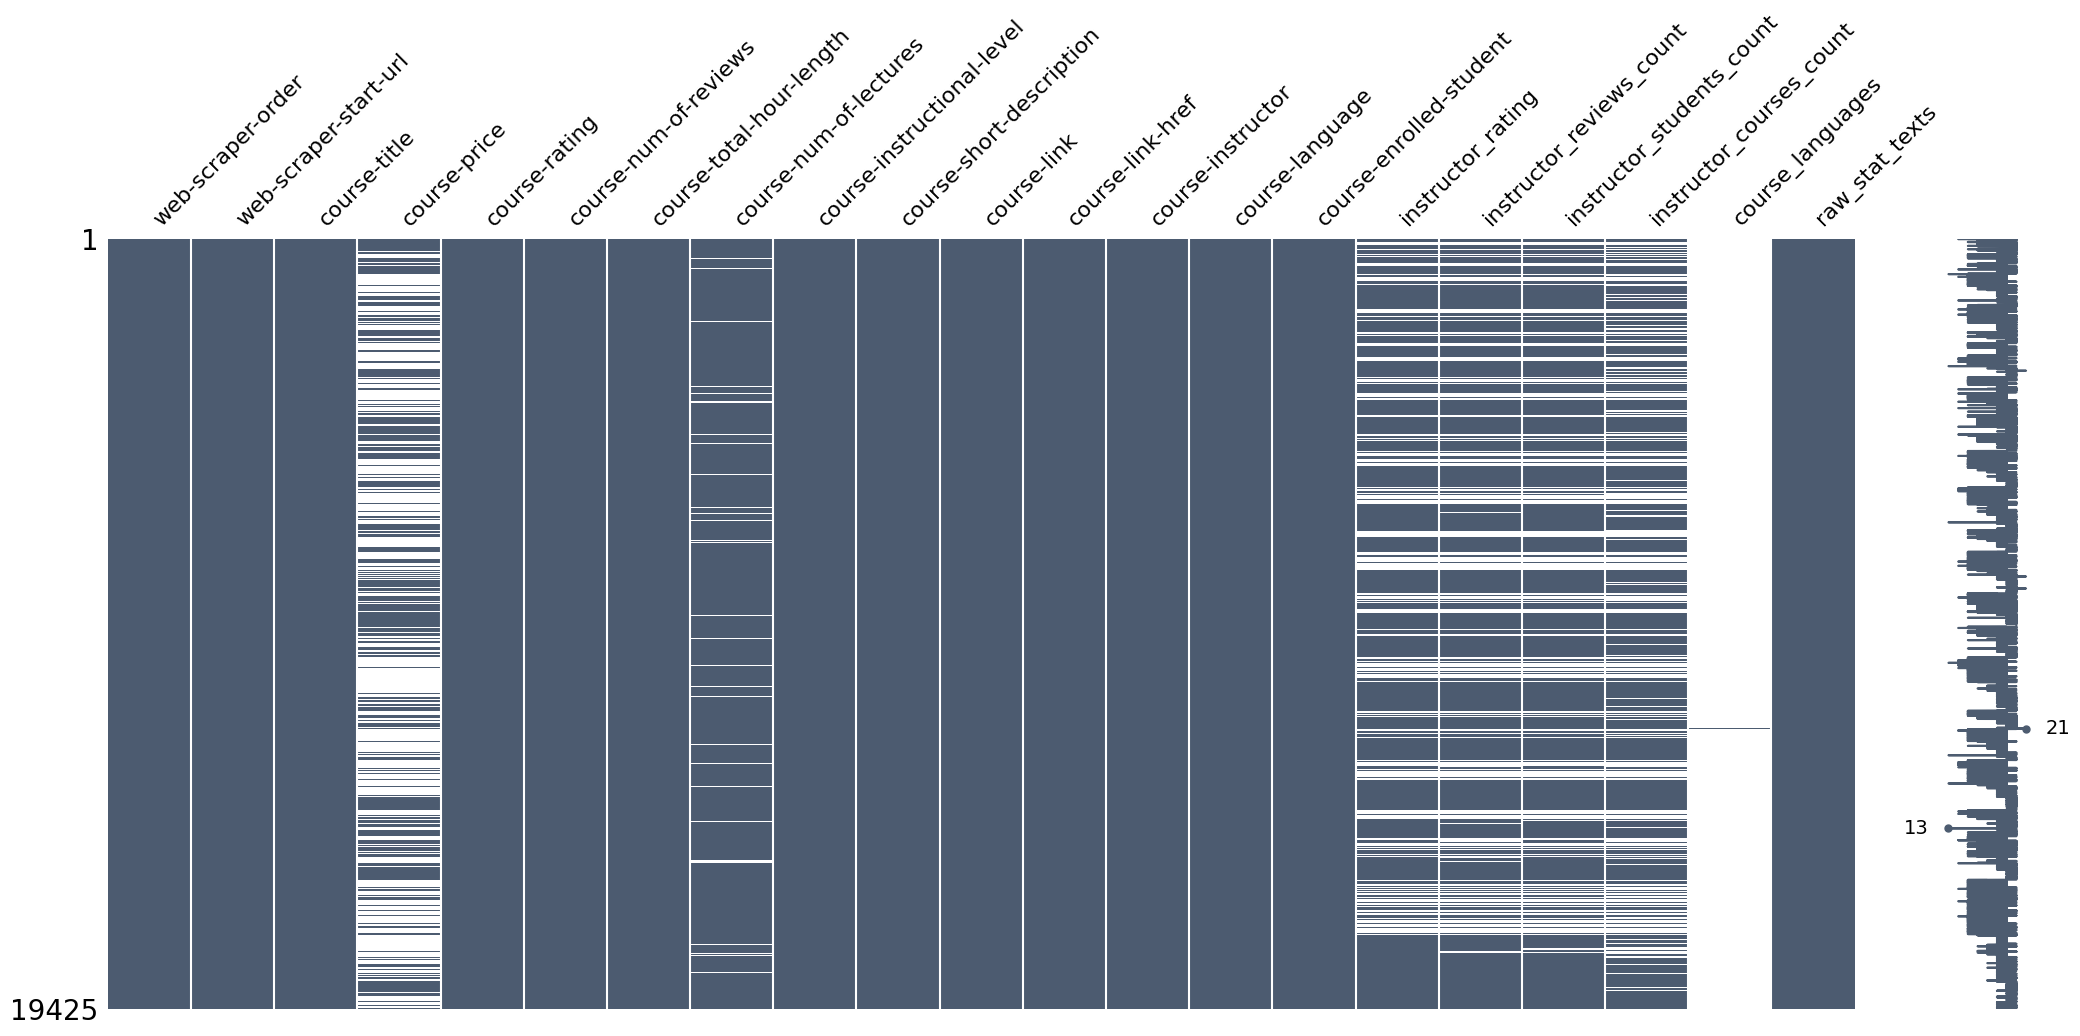

In [6]:
msno.matrix(df,color=(0.3,0.36,0.44))

In [7]:
# Remove unintended empty columns created by the web scraper
df.drop(['course_languages','instructor_rating','instructor_reviews_count',
         'instructor_students_count','instructor_courses_count'],
        axis=1,inplace=True)

In [8]:
# Extract instructor information from a single merged column into four separate columns
df[['instructor-rating', 'instructor-reviews', 'instructor-students', 
    'instructor-courses']] = df['raw_stat_texts'].str.split(', ', expand=True).iloc[:, :4]

In [9]:
# Excluded from analysis due to lack of contextual relevance in the business case
df.drop(['web-scraper-order','course-short-description','course-link',
         'course-link-href','course-instructor','raw_stat_texts','course-rating',
         'course-num-of-reviews'],axis=1,inplace=True)

In [10]:
# Drop rows with any missing values (NA)
df.dropna(inplace=True)

In [11]:
df.head(5)

,web-scraper-start-url,course-title,course-price,course-total-hour-length,course-num-of-lectures,course-instructional-level,course-language,course-enrolled-student,instructor-rating,instructor-reviews,instructor-students,instructor-courses
3,https://www.udemy.com/topic/dax/?p=4,"【続】Microsoft Power BI Desktop - 入門講座 ～DAX-""X"" ...",Current price: £29.99,3.5 total hours,22 lectures,Beginner,日本語,"1,679人の受講生",['4.3 Instructor Rating',"'60,180 Reviews'","'147,363 Students'",'50 Courses']
4,https://www.udemy.com/topic/dax/?p=4,【続】Microsoft Power BI Desktop- 入門講座 DAX-TABLE ...,Current price: £22.99,3.5 total hours,29 lectures,Beginner,日本語,"1,425人の受講生",['4.3 Instructor Rating',"'60,180 Reviews'","'147,363 Students'",'50 Courses']
5,https://www.udemy.com/topic/dax/?p=4,3/4|DAX Dili Eğitim Videosu SerisiPower BI 'ni...,Current price: £19.99,5 total hours,59 lectures,Intermediate,Türkçe,1.661 öğrenci,['4.4 Instructor Rating',"'3,967 Reviews'","'60,709 Students'",'15 Courses']
6,https://www.udemy.com/topic/dax/?p=4,"【続】Microsoft - Excel Power Pivot 入門講座 DAX-""X"" ...",Current price: £22.99,3.5 total hours,22 lectures,Beginner,日本語,720人の受講生,['4.3 Instructor Rating',"'60,180 Reviews'","'147,363 Students'",'50 Courses']
7,https://www.udemy.com/topic/dax/?p=4,Máster en DAX y Power Pivot de la A a la ZAnál...,Current price: £19.99,24 total hours,156 lectures,All Levels,Español,439 estudiantes,['4.4 Instructor Rating','254 Reviews',"'1,114 Students'",'9 Courses']


<Axes: >

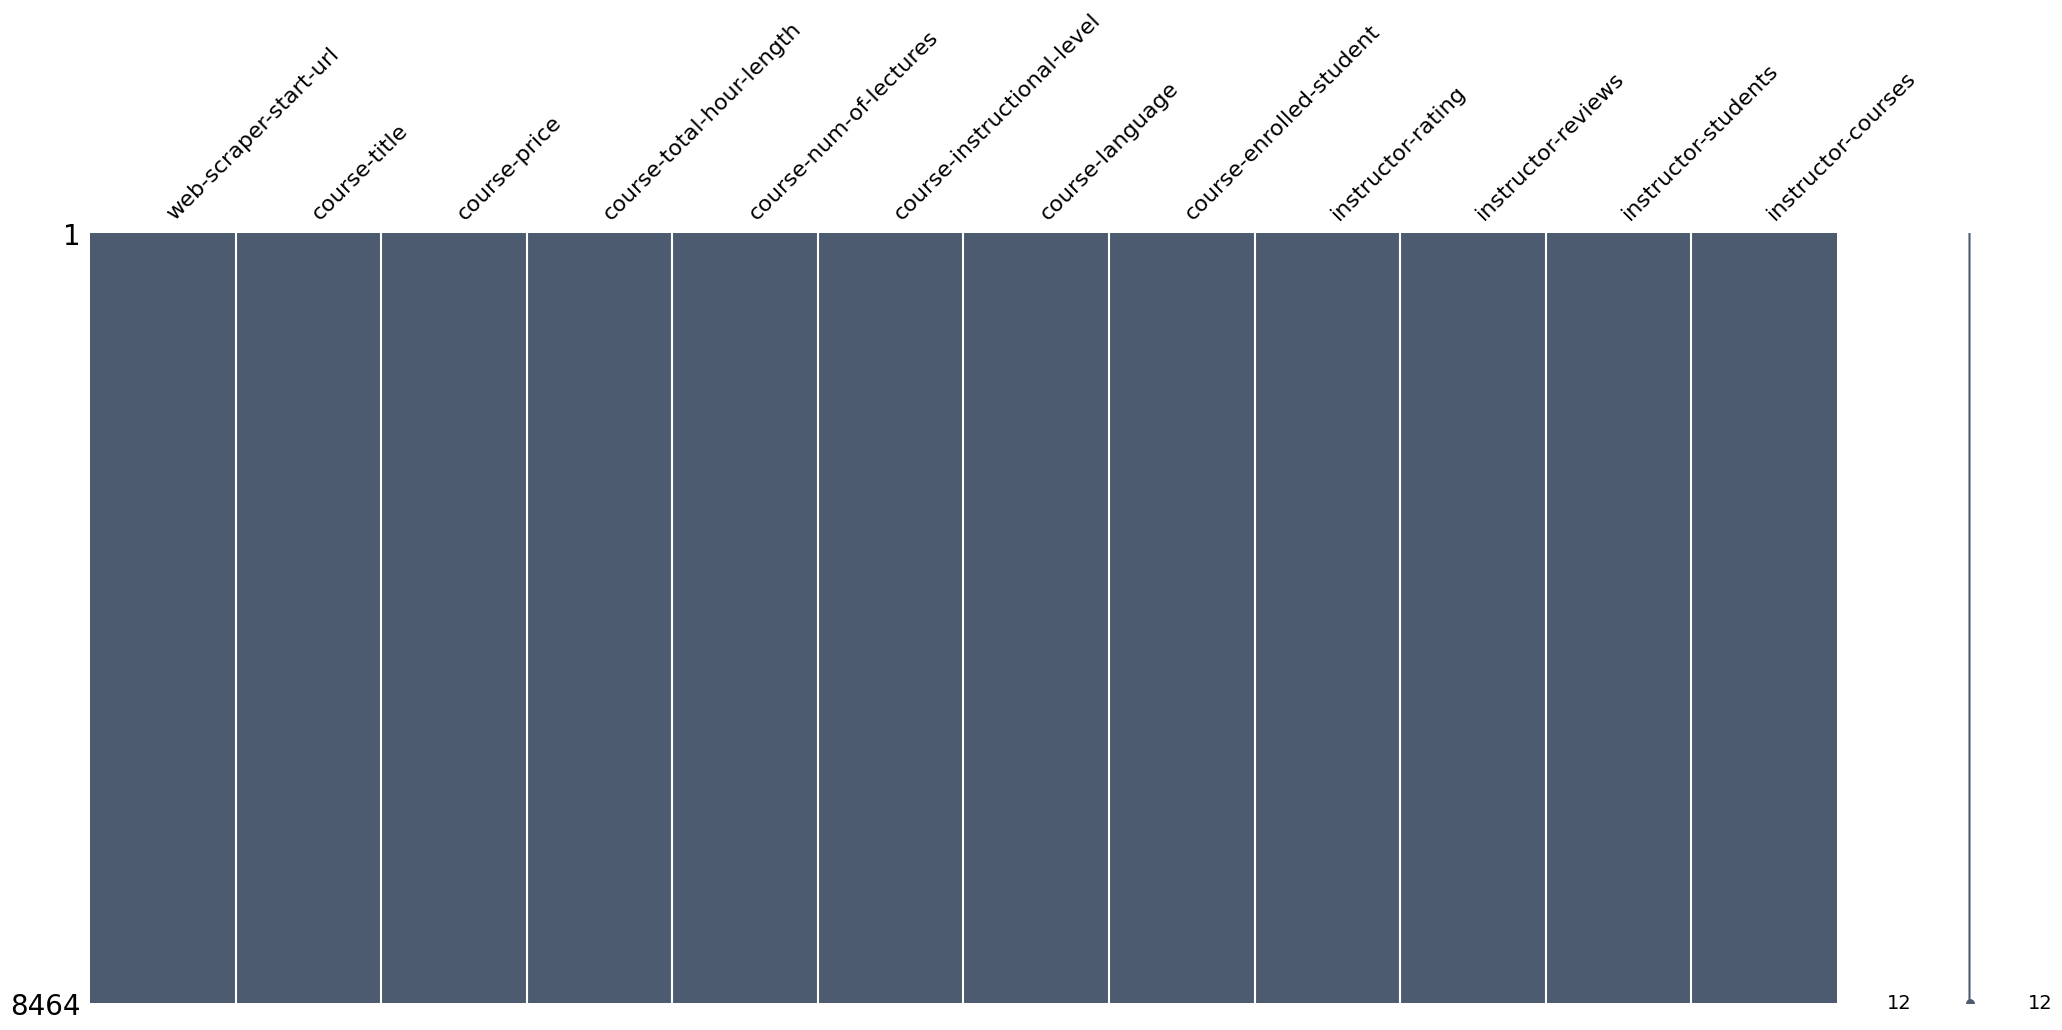

In [12]:
# Columns after cleaning
msno.matrix(df,color=(0.3,0.36,0.44))

## Cleaning variables

In [13]:
from util import clean_course_price,clean_num_of_reviews,extract_number

# Extract topic name from 'web-scraper-start-url'
df['topic_name'] = df['web-scraper-start-url'].apply(lambda x: x.split('/')[-2] if isinstance(x, str) else None)

# not needed anymore
df.drop(['web-scraper-start-url'],axis=1,inplace=True)

# Convert 'course-total-hour-length' to numeric
# Assuming 'course-total-hour-length' might contain text like '1.5 total hours', extract the numeric part
df['course-total-hour-length'] = df['course-total-hour-length'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

# Convert 'course-num-of-lectures' to integer
# Assuming 'course-num-of-lectures' might contain text like '20 lectures', extract the numeric part
df['course-num-of-lectures'] = df['course-num-of-lectures'].str.extract(r'(\d+)').astype(int)

# Apply the cleaning function to the 'course-price' column
df['course-price'] = df['course-price'].apply(clean_course_price)

# Apply the function to the 'course-enrolled-student' column
df['course-enrolled-student'] = df['course-enrolled-student'].apply(extract_number)

# Extracting the number of courses an instructor has given
df['instructor-courses'] = df['instructor-courses'].str.extract('(\d+)').astype(int)

# Extracting the number of students an instructor has
df['instructor-students'] = df['instructor-students'].apply(extract_number).fillna(0).astype(int)

# Extracting the number of reviews an instructor received
df['instructor-reviews'] = df['instructor-reviews'].apply(extract_number).fillna(0).astype(int)

# Extracting the instructor ratings
df['instructor-rating'] = df['instructor-rating'].str.extract(r'(\d+\.\d+)').astype(float)

df.dropna(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8364 entries, 3 to 19414
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   course-title                8364 non-null   object 
 1   course-price                8364 non-null   float64
 2   course-total-hour-length    8364 non-null   float64
 3   course-num-of-lectures      8364 non-null   int64  
 4   course-instructional-level  8364 non-null   object 
 5   course-language             8364 non-null   object 
 6   course-enrolled-student     8364 non-null   int64  
 7   instructor-rating           8364 non-null   float64
 8   instructor-reviews          8364 non-null   int64  
 9   instructor-students         8364 non-null   int64  
 10  instructor-courses          8364 non-null   int64  
 11  topic_name                  8364 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 849.5+ KB


## Outlier Analysis

Outlier analysis is crucial to data preparation because outliers can skew model performance, leading to inaccuracies. The original variables had many outliers. For instance, the highest value of **`course-enrolled-student`** is 1,976,468, whereas 50% of this variable's values ranged from 136 to 6,689 students. 

In [15]:
df.describe()

,course-price,course-total-hour-length,course-num-of-lectures,course-enrolled-student,instructor-rating,instructor-reviews,instructor-students,instructor-courses
count,"8,364.00","8,364.00","8,364.00","8,364.00","8,364.00","8,364.00","8,364.00","8,364.00"
mean,33.75,11.30,80.07,"12,550.30",4.30,"30,484.82","190,122.15",47.95
std,20.41,14.37,96.26,"57,349.64",0.45,"119,090.28","475,173.46",108.87
min,19.99,1.00,4.00,0.00,0.00,0.00,0.00,1.00
25%,19.99,3.00,25.00,136.00,4.20,199.75,"2,682.00",3.00
50%,29.99,6.50,49.00,"1,062.00",4.40,"1,625.00","22,377.00",10.00
75%,39.99,13.50,95.00,"6,689.00",4.50,"12,312.00","134,943.00",31.00
max,199.99,197.50,800.00,"1,976,468.00",5.00,"1,221,025.00","4,061,794.00",689.00


We used log transformation and winsorization to adjust for such outliers. For some variables, these methods still presented many outliers. To handle these values, the capped variables were further log-transformed. 

#### Handling outliers

In [16]:
# importing utilities functions
from util import transform_columns,compare_methods_boxplots_separate

In [17]:
# List of variables to transform
variables_to_transform = [
    'course-price',
    'course-total-hour-length',
    'course-num-of-lectures',
    'course-enrolled-student',
    'instructor-rating',
    'instructor-reviews',
    'instructor-students',
    'instructor-courses'
]

# Apply the transform_columns function to all variables
df = transform_columns(df, columns=variables_to_transform, cap_percentile=0.99)

# Display the first few rows of the updated DataFrame to verify the changes
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8364 entries, 3 to 19414
Data columns (total 36 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   course-title                                8364 non-null   object 
 1   course-price                                8364 non-null   float64
 2   course-total-hour-length                    8364 non-null   float64
 3   course-num-of-lectures                      8364 non-null   int64  
 4   course-instructional-level                  8364 non-null   object 
 5   course-language                             8364 non-null   object 
 6   course-enrolled-student                     8364 non-null   int64  
 7   instructor-rating                           8364 non-null   float64
 8   instructor-reviews                          8364 non-null   int64  
 9   instructor-students                         8364 non-null   int64  
 10  instructor-

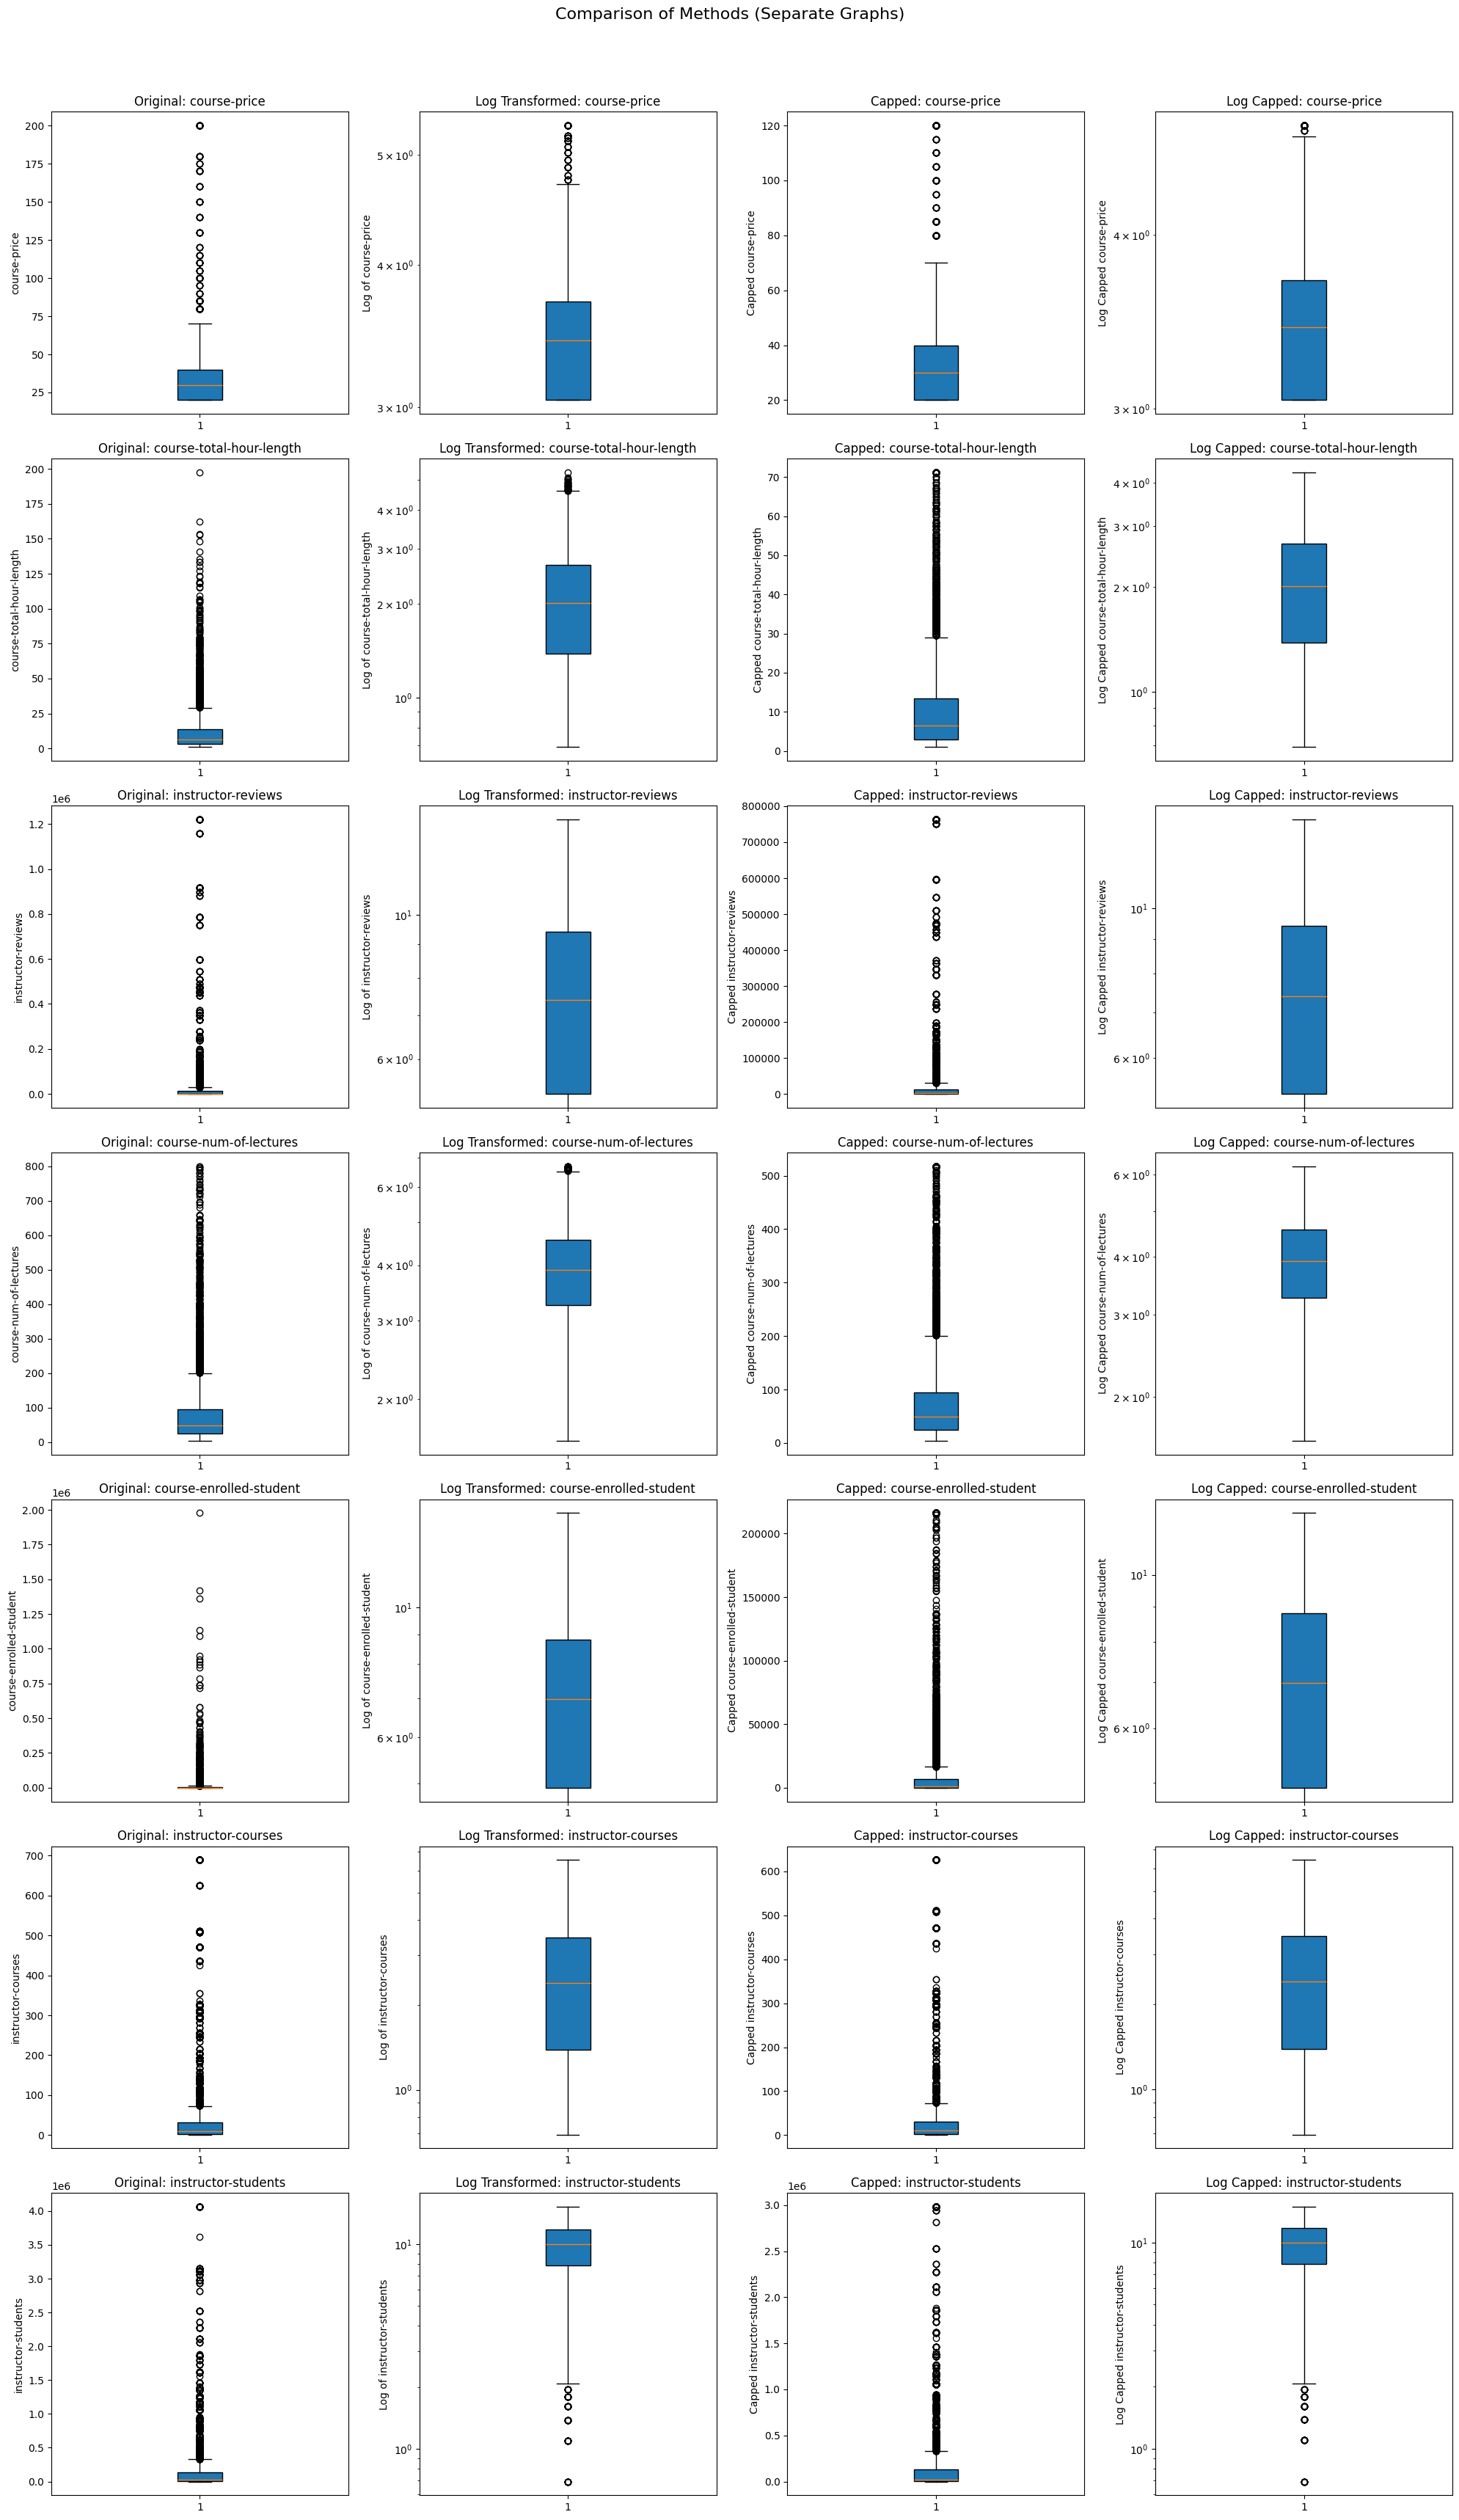

In [18]:
# Visualizing the variables
log_capped_variables = [
    ['course-price', 'course-price_only_logged', 'course-price_only_capped', 'course-price_capped_and_logged'],
    ['course-total-hour-length', 'course-total-hour-length_only_logged', 'course-total-hour-length_only_capped', 'course-total-hour-length_capped_and_logged'],
    ['instructor-reviews', 'instructor-reviews_only_logged', 'instructor-reviews_only_capped', 'instructor-reviews_capped_and_logged'],
    ['course-num-of-lectures', 'course-num-of-lectures_only_logged', 'course-num-of-lectures_only_capped', 'course-num-of-lectures_capped_and_logged'],
    ['course-enrolled-student', 'course-enrolled-student_only_logged', 'course-enrolled-student_only_capped', 'course-enrolled-student_capped_and_logged'],
    ['instructor-courses', 'instructor-courses_only_logged', 'instructor-courses_only_capped', 'instructor-courses_capped_and_logged'],
    ['instructor-students', 'instructor-students_only_logged', 'instructor-students_only_capped', 'instructor-students_capped_and_logged'],
]

# Using a function from utility
compare_methods_boxplots_separate(df, log_capped_variables)

The boxplots above compare the original, log-transformed, capped and log-capped variables. Log transformation significantly reduced outliers for some variables, whereas capping and then log-transforming worked better for others. Winsorization was not useful since many outliers persisted. Thus, for consistency, all variables chosen in the model were capped and log-transformed.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8364 entries, 3 to 19414
Data columns (total 36 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   course-title                                8364 non-null   object 
 1   course-price                                8364 non-null   float64
 2   course-total-hour-length                    8364 non-null   float64
 3   course-num-of-lectures                      8364 non-null   int64  
 4   course-instructional-level                  8364 non-null   object 
 5   course-language                             8364 non-null   object 
 6   course-enrolled-student                     8364 non-null   int64  
 7   instructor-rating                           8364 non-null   float64
 8   instructor-reviews                          8364 non-null   int64  
 9   instructor-students                         8364 non-null   int64  
 10  instructor-

## Feature Engineering 

Reducing dimensionality is a critical as it improve computational efficiency and reduce the risk of overfitting (Murel and Kavlakoglu, 2024). Instead of encoding and treating 28 course topics as individual features, the dimensions has been reduced from 28 to 3 by grouping all topics into three broader categories as shown in the Table3.  
 

                            Table 3. Topics classification

| Analytics, AI & ML      | IT & Software      | Programming Language |
|-------------------------|--------------------|----------------------|
| machine-learning        | web-development    | python               |
| data-science            | unity              | c-sharp              |
| artificial-intelligence | google-flutter     | javascript           |
| data-analysis           | sql                | java                 |
| generative-ai           | microsoft-power-bi | c-plus-plus          |
| business-intelligence   | unreal-engine      | angular              |
| business-analytics      | game-development   | css                  |
| deep-learning           | docker             | react                |
| data-modeling           | tableau            | dax                  |
| business-analysis       |                    |                      |

The dataset was obtained by web scraping topic links on the Udemy website. Some courses were associated with multiple topics, leading to duplicates where the same course appeared under different categories. To address this, we applied one-hot encoding to the course-category column, creating three dummy variables indicating category membership. For courses spanning multiple categories, we grouped them by unique titles and aggregated using the max function to ensure accurate encoding. As a result, courses with multiple topics are identified by having a value of 1 in multiple category dummy variables.

To reduce dimensions, the 36 course languages were simplified into a binary column, is_english, with English courses labeled as 1 and others as 0. Similarly, instructional levels were encoded into four categories: All levels, Beginner, Intermediate, and Expert, with 1 indicating membership in the respective category.




#### Encoding category, language, and course instructional (difficulty) level


In [20]:
#Classify topics into categories
analytics_ai_ml = [
    "machine-learning", "data-science", "artificial-intelligence",
    "data-analysis", "generative-ai", "business-intelligence",
    "business-analytics", "business-analysis","deep-learning",
    "data-modeling"
]

it_software = [
    "web-development", "unity", "google-flutter", "sql",
    "microsoft-power-bi", "unreal-engine", "game-development",
    "docker", "tableau"
]
programming_languages = [
    "python", "c-sharp", "javascript", "java",
    "c-plus-plus", "angular", "css", "react", "dax"
]

# Function to assign categories
def assign_category(topic):
    if topic in analytics_ai_ml:
        return "Analytics, AI & ML"
    elif topic in it_software:
        return "IT & Software"
    elif topic in programming_languages:
        return "Programming Language"
    else:
        return "Other"

# Add the new column based on the topic
df['course-category'] = df['topic_name'].apply(assign_category)
df['course-category'].value_counts()

Programming Language    3452
IT & Software           2808
Analytics, AI & ML      2104
Name: course-category, dtype: int64

In [21]:
# Encode categories for each course

# Step 1: Perform one-hot encoding on the 'course-category' column
category_dummies = pd.get_dummies(df['course-category'], prefix='category')

# Step 2: Combine the encoded categories with the original DataFrame
df_encoded = pd.concat([df, category_dummies], axis=1)

# Step 3: Aggregate duplicate rows by course-title
# Use max for categories to ensure binary encoding (0/1)
df_encoded = df_encoded.groupby('course-title').agg({
    **{col: 'max' for col in category_dummies.columns},  # Take max for category columns
    **{col: 'first' for col in df.columns if col not in ['course-category', 'course-title']}  # Keep the first value for non-category columns
}).reset_index()

# Step 4: Ensure all category columns are strictly 0 or 1
category_columns = [col for col in df_encoded.columns if col.startswith('category_')]
df_encoded[category_columns] = df_encoded[category_columns].clip(upper=1).astype(int)

# Display the first few rows of the cleaned DataFrame
df_encoded.head()

,course-title,"category_Analytics, AI & ML",category_IT & Software,category_Programming Language,course-price,course-total-hour-length,course-num-of-lectures,course-instructional-level,course-language,course-enrolled-student,...,instructor-rating_capped_and_logged,instructor-reviews_only_capped,instructor-reviews_only_logged,instructor-reviews_capped_and_logged,instructor-students_only_capped,instructor-students_only_logged,instructor-students_capped_and_logged,instructor-courses_only_capped,instructor-courses_only_logged,instructor-courses_capped_and_logged
0,!Unreal Engine 5 دورة تطوير الالعاب المتكاملة ...,0,1,0,19.99,12.50,31,Beginner,Arabic,794,...,1.74,211.00,5.36,5.36,823.00,6.71,6.71,1.00,0.69,0.69
1,"""E-Justice"": How find mistakes of algorithmic ...",1,0,0,22.99,1.00,13,All Levels,English,32,...,1.69,197.00,5.29,5.29,717.00,6.58,6.58,12.00,2.56,2.56
2,#1 Unity Hyper Casual Cricket Mobile Game usin...,0,1,0,49.99,12.50,103,Beginner,English,416,...,1.74,"1,269.00",7.15,7.15,"7,700.00",8.95,8.95,21.00,3.09,3.09
3,(100+ Saat) Aranan Programcı Olma Kamp Kursu| ...,0,0,1,49.99,104.50,659,All Levels,Türkçe,93791,...,1.72,"56,974.00",10.95,10.95,"266,058.00",12.49,12.49,17.00,2.89,2.89
4,(120+Saat)Komple Uygulamalı Web Geliştirme Eği...,0,1,0,44.99,123.00,800,All Levels,Türkçe,4855,...,1.70,"11,327.00",9.34,9.34,"67,881.00",11.13,11.13,21.00,3.09,3.09


In [22]:
# Check if all value are binary

# Step 1: Identify category columns
category_columns = [col for col in df_encoded.columns if col.startswith('category_')]

# Step 2: Check if all values in each category column are binary
for column in category_columns:
    unique_values = df_encoded[column].unique()
    is_binary = set(unique_values).issubset({0, 1})
    print(f"Column '{column}' is binary: {is_binary}")
    print(f"Unique values in '{column}': {unique_values}")

Column 'category_Analytics, AI & ML' is binary: True
Unique values in 'category_Analytics, AI & ML': [0 1]
Column 'category_IT & Software' is binary: True
Unique values in 'category_IT & Software': [1 0]
Column 'category_Programming Language' is binary: True
Unique values in 'category_Programming Language': [0 1]


In [23]:
## Check Course with mutiple category

# Step 1: Identify category columns
category_columns = [col for col in df_encoded.columns if col.startswith('category_')]

# Step 2: Filter rows with multiple categories (sum of category columns > 1)
df_combined = df_encoded[df_encoded[category_columns].sum(axis=1) > 1]

# Step 3: Display the rows with combined categories
print("Courses with Combined Categories (e.g., 110, 101, 011, etc.):")
df_combined.head()  # Display the first few rows


Courses with Combined Categories (e.g., 110, 101, 011, etc.):


,course-title,"category_Analytics, AI & ML",category_IT & Software,category_Programming Language,course-price,course-total-hour-length,course-num-of-lectures,course-instructional-level,course-language,course-enrolled-student,...,instructor-rating_capped_and_logged,instructor-reviews_only_capped,instructor-reviews_only_logged,instructor-reviews_capped_and_logged,instructor-students_only_capped,instructor-students_only_logged,instructor-students_capped_and_logged,instructor-courses_only_capped,instructor-courses_only_logged,instructor-courses_capped_and_logged
62,"16 beginner programming projects: Java, Python...",0,1,1,29.99,17.00,164,Beginner,English,2507,...,1.63,"45,072.00",10.72,10.72,"783,678.00",13.57,13.57,471.00,6.16,6.16
97,2024 UPDATED - HTML5 Elements & CSS3 Propertie...,0,1,1,44.99,17.50,203,All Levels,English,2115,...,1.70,"2,268.00",7.73,7.73,"12,038.00",9.40,9.40,7.00,2.08,2.08
146,"50+ Web Projects with HTML, CSS, and JavaScrip...",0,1,1,54.99,25.00,101,All Levels,English,5412,...,1.72,"9,309.00",9.14,9.14,"72,163.00",11.19,11.19,17.00,2.89,2.89
179,A to Z Unity® Development: Code in C# and Make...,0,1,1,24.99,18.50,141,Beginner,English,62,...,1.65,"12,312.00",9.42,9.42,"387,020.00",12.87,12.87,308.00,5.73,5.73
500,"Angular Material, Universal: A Rapid Guide - A...",0,1,1,34.99,4.50,45,Intermediate,English,139,...,1.65,"3,397.00",8.13,8.13,"29,689.00",10.30,10.30,84.00,4.44,4.44


In [24]:
# Resetting the original df

df = df_encoded.copy()

df['course-category'] = df['topic_name'].apply(assign_category)

##### course-language
##### is_english


In [25]:
# See number of unique course language
len(df['course-language'].unique())

36

In [26]:
# Encode languages for each course
# Splitting into english and non-english

df['is_english'] = (df['course-language'] == 'English').astype(int)

In [27]:
# Check if 'is_english' column is binary
unique_values = df['is_english'].unique()
is_binary = set(unique_values).issubset({0, 1})

print(f"Column 'is_english' is binary: {is_binary}")
print(f"Unique values in 'is_english': {unique_values}")

Column 'is_english' is binary: True
Unique values in 'is_english': [0 1]


##### course-instructional-level  

In [28]:
# Create variable
x = df['course-instructional-level']

# Perform one-hot encoding
df = pd.get_dummies(df, columns=['course-instructional-level'], prefix='course-difficulty',dtype=float)

df['course-instructional-level'] = x

# Display the new DataFrame
df[['course-difficulty_All Levels','course-difficulty_Beginner','course-difficulty_Expert','course-difficulty_Intermediate','course-instructional-level']].head()

,course-difficulty_All Levels,course-difficulty_Beginner,course-difficulty_Expert,course-difficulty_Intermediate,course-instructional-level
0,0.00,1.00,0.00,0.00,Beginner
1,1.00,0.00,0.00,0.00,All Levels
2,0.00,1.00,0.00,0.00,Beginner
3,1.00,0.00,0.00,0.00,All Levels
4,1.00,0.00,0.00,0.00,All Levels


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8150 entries, 0 to 8149
Data columns (total 45 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   course-title                                8150 non-null   object 
 1   category_Analytics, AI & ML                 8150 non-null   int64  
 2   category_IT & Software                      8150 non-null   int64  
 3   category_Programming Language               8150 non-null   int64  
 4   course-price                                8150 non-null   float64
 5   course-total-hour-length                    8150 non-null   float64
 6   course-num-of-lectures                      8150 non-null   int64  
 7   course-language                             8150 non-null   object 
 8   course-enrolled-student                     8150 non-null   int64  
 9   instructor-rating                           8150 non-null   float64
 10  instructor-r

# Exploratory Data Analysis (EDA)

## Descriptive Analysis

After preparing the data, the next step involves conducting descriptive and exploratory analyses to gain insights into the dataset.

In [30]:
# Selecting the capped features for descriptive statistics
selected_capped_feature = df[['course-enrolled-student_only_capped', 
                               'instructor-courses_only_capped', 
                               'instructor-students_only_capped',
                               'course-price_only_capped',
                               'course-total-hour-length_only_capped', 
                               'course-num-of-lectures_only_capped',
                               'instructor-rating_only_capped', 
                               'instructor-reviews_only_capped']]

In [31]:
# Transposing it to make the descriptive statistics easier to read
selected_summary = selected_capped_feature.describe().transpose() 
print(selected_summary)

                                        count       mean        std   min  \
course-enrolled-student_only_capped  8,150.00   9,910.26  28,340.07  0.00   
instructor-courses_only_capped       8,150.00      46.82     105.16  1.00   
instructor-students_only_capped      8,150.00 182,097.51 438,002.11  0.00   
course-price_only_capped             8,150.00      33.07      16.80 19.99   
course-total-hour-length_only_capped 8,150.00      10.98      12.77  1.00   
course-num-of-lectures_only_capped   8,150.00      78.20      88.97  4.00   
instructor-rating_only_capped        8,150.00       4.30       0.45  0.00   
instructor-reviews_only_capped       8,150.00  27,221.50  95,922.48  0.00   

                                          25%       50%        75%  \
course-enrolled-student_only_capped    131.00  1,029.00   6,477.00   
instructor-courses_only_capped           3.00     10.00      30.00   
instructor-students_only_capped      2,646.25 22,026.50 132,051.25   
course-price_only_capped  

The statistics show that courses have 9,910 students enrolled, are priced around £33, and last about 11 hours on average.

Looking at the instructors' profiles, they generally offer around 46 courses, reaching an average of 182,097 students in total. Instructors also receive about 27,221 reviews on average and maintain a rating of 4.3 stars, suggesting a high level of positive feedback from students.

In [32]:
# Selecting the log-transformed feature for histogram visualization
selected_logged_feature = df[['course-enrolled-student_capped_and_logged',
                               'course-total-hour-length_capped_and_logged',
                               'course-num-of-lectures_capped_and_logged',
                               'instructor-rating_capped_and_logged',
                               'instructor-reviews_capped_and_logged',
                               'instructor-students_capped_and_logged',
                               'instructor-courses_capped_and_logged',
                               'course-price_capped_and_logged']]

Histograms further clarify the distributions of key variables after they are transformed with log. 

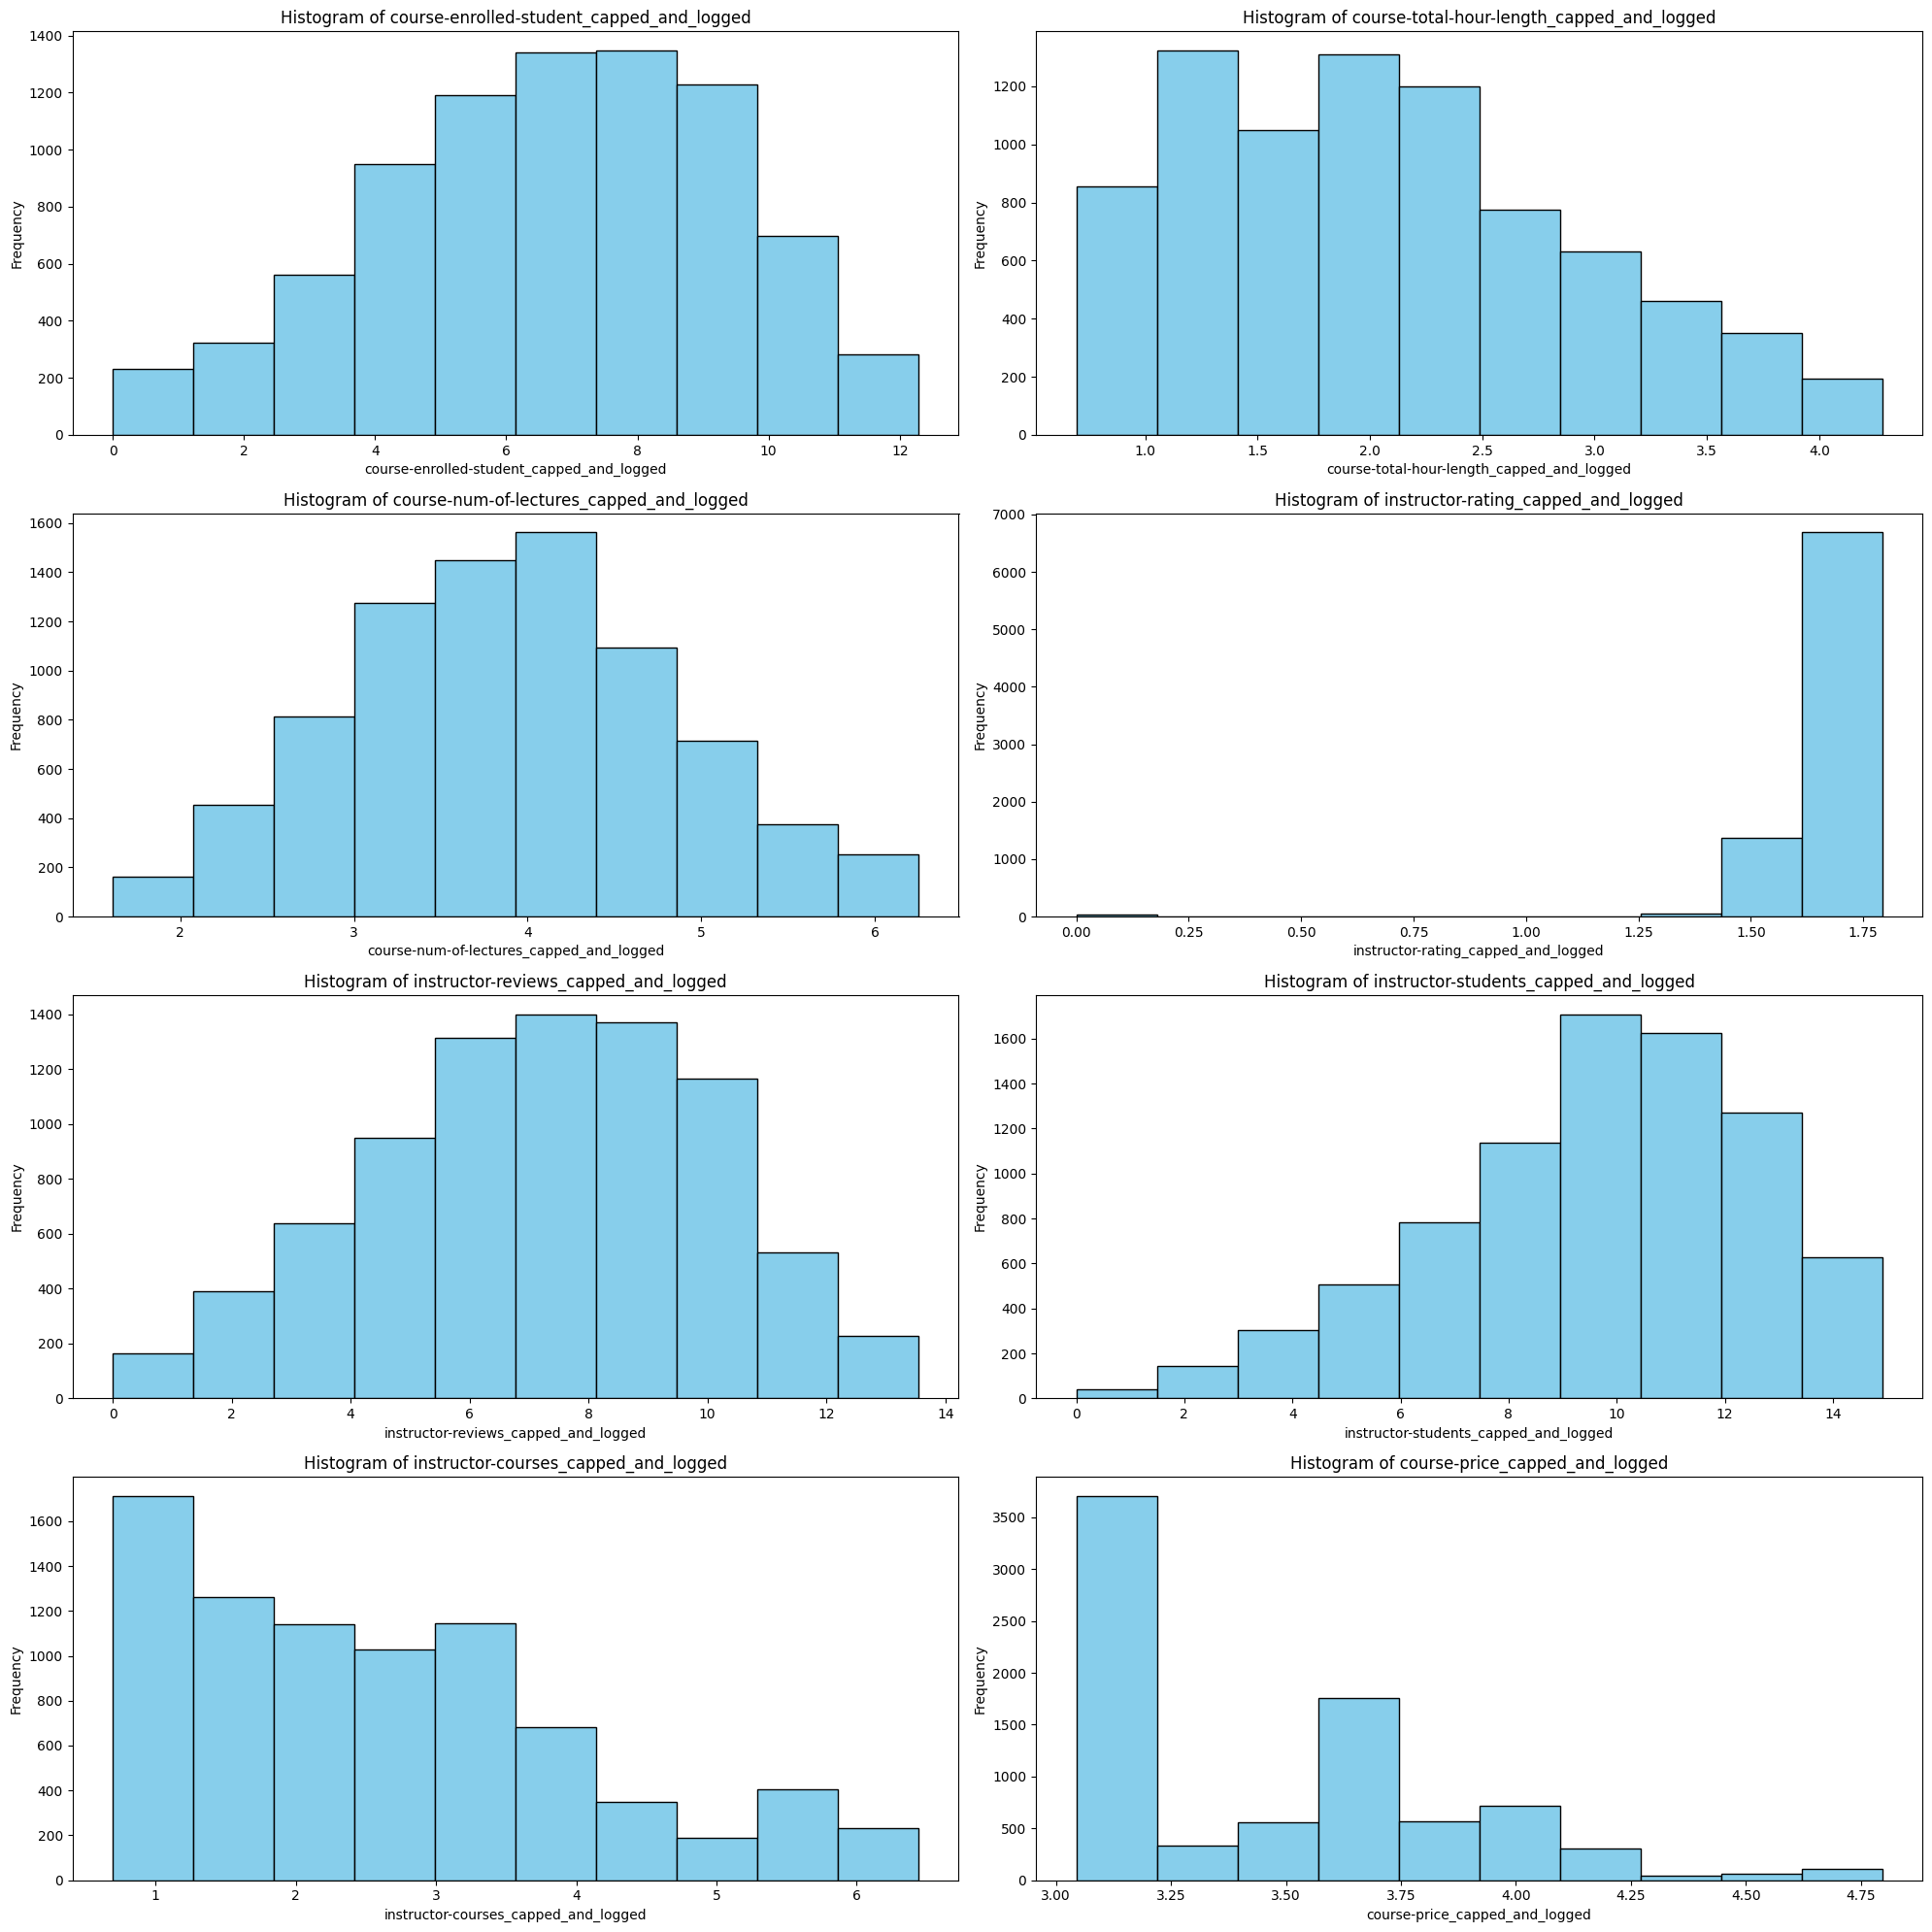

In [33]:
# Create subplots
fig2, axes = plt.subplots(4, 2, figsize=(20, 20))  # 2 rows and 4 columns
axes = axes.flatten()  # Flatten to iterate easily

# Plot a histogram for each column
for i, col in enumerate(selected_logged_feature.columns):
    axes[i].hist(selected_logged_feature[col], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout and display
plt.tight_layout()  # Prevent overlapping
plt.show()

Histograms further clarify the distributions of key variables after they are transformed with log. The number of students and lectures per course, and instructor reviews follow a roughly normal distribution. Conversely, the other variables are skewed, especially the instructor rating and course price distribution. 

This skewness might be caused by the data scraping and data cleaning process, which may have excluded free courses or removed rows with missing values, potentially impacting the overall distribution. The skewness in instructor-students could also display the dominance of popular instructors in the platform.

The dataset is well-represented across the three main categories, with 3,450 courses in "Programming Language," 2,808 in "IT & Software," and 2,104 in "Analytics, AI & ML." English-language courses dominated the dataset, with 5,230 marked as **`is_english`**. Meanwhile, instructional levels were distributed across four categories.


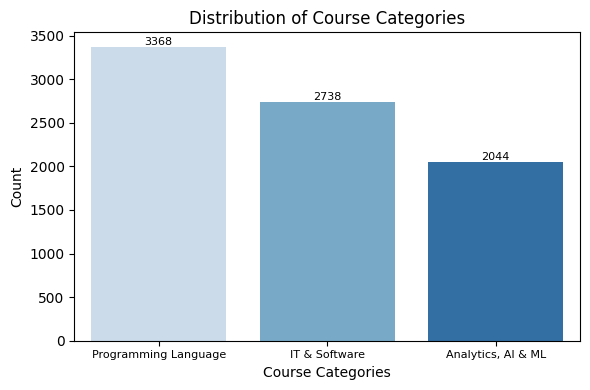

In [34]:
# Summary of categorical variables for topics

# Count the occurrences of each category
category_distribution = df['course-category'].value_counts()

# Plot the distribution
plt.figure(figsize=(6, 4))
barch = sns.barplot(x=category_distribution.index, y=category_distribution.values, 
            palette='Blues',hue=category_distribution.index,legend=False)
# Add labels to the bars
for i, value in enumerate(category_distribution.values):
    barch.text(i, value + 1,  # Adjust the y-coordinate for spacing
            str(value), 
            ha='center', va='bottom', fontsize=8)
# Customize the plot
plt.title("Distribution of Course Categories", fontsize=12)
plt.xlabel("Course Categories", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.xticks(rotation=0, ha='center', fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()


In [35]:
# Summary of categorical variables for language
num_english_courses = df['is_english'].sum()
print(f"The number of english course in the dataset: {num_english_courses}")

The number of english course in the dataset: 5074


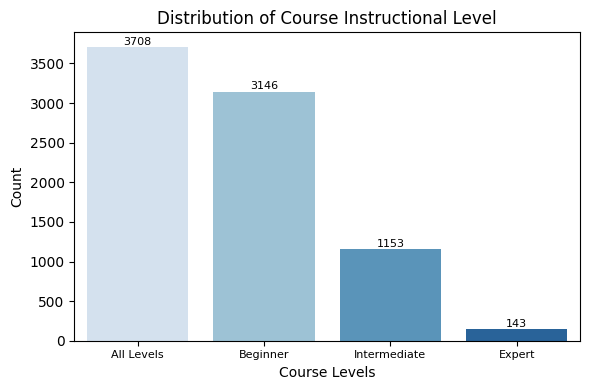

In [36]:
# Summary of categorical variables for instructional levels

# Count the occurrences of each instructional level
instructional_distribution = df['course-instructional-level'].value_counts()

# Plot the distribution
plt.figure(figsize=(6, 4))
barch = sns.barplot(x=instructional_distribution.index, y=instructional_distribution.values, 
            palette='Blues',hue=instructional_distribution.index,legend=False)
# Add labels to the bars
for i, value in enumerate(instructional_distribution.values):
    barch.text(i, value + 1,  # Adjust the y-coordinate for spacing
            str(value), 
            ha='center', va='bottom', fontsize=8)
# Customize the plot
plt.title("Distribution of Course Instructional Level", fontsize=12)
plt.xlabel("Course Levels", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.xticks(rotation=0, ha='center', fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()

## Correlation Studies and Feature Selection

We explored the relationship between relevant independent variables and the dependent variable, course-enrolled-student_log as shown in Table below.

                              Table 4. Correlation level table


| Correlation Level | Variable                                                                     | Correlation Value | Correlation Type |
|-------------------|------------------------------------------------------------------------------|-------------------|------------------|
| **High**          | Number of students instructor taught                                         | 0.66              | Positive         |
| **High**          | Instructor reviews                                                           | 0.57              | Positive         |
| **Moderate**      | Course price                                                                 | 0.35              | Positive         |
| **Moderate**      | Number of lectures                                                           | 0.32              | Positive         |
| **Moderate**      | English language (is_english)                                                | 0.29              | Positive         |
| **Low**           | Total course hours                                                           | 0.19              | Positive         |
| **Low**           | Number of courses instructor launched                                        | 0.18              | Positive         |
| **Low**           | Instructor rating                                                            | 0.14              | Positive         |
| **Low**           | Programming Language category                                                | 0.11              | Positive         |
| **Low**           | Course difficulty (All Levels)                                               | 0.11              | Positive         |
| **Low**           | Course difficulty (Intermediate)                                             | -0.03             | Negative         |
| **Low**           | Analytics, AI & ML category                                                  | -0.05             | Negative         |
| **Low**           | Course difficulty (Expert)                                                   | -0.05             | Negative         |
| **Low**           | IT & Software category                                                       | -0.06             | Negative         |
| **Low**           | Course difficulty (Beginner)                                                 | -0.07             | Negative         |

In the variable selection, we included all the relevant cleaned variables and dummy variables in the correlation metrix, especially those with high correlation to number of student enrolled. These variable add explanatory power to the model, increasing model accuracy.  Additionally, variables like category and difficult-level dummy variables, despite their low correlation, were included for their contextual value, as they may capture indirect or niche effects on enrollments.


In [37]:
# These are the variables we decided to use to train our ML models
df_ml = df[[ 'course-enrolled-student_capped_and_logged',
             'course-price_capped_and_logged',
             'instructor-reviews_capped_and_logged',
             'is_english',
             'instructor-courses_capped_and_logged',
             'instructor-students_capped_and_logged',
             'course-num-of-lectures_capped_and_logged',
             'instructor-rating_capped_and_logged',
             'category_Analytics, AI & ML',
             'category_IT & Software',
             'category_Programming Language',
             'course-difficulty_All Levels',
             'course-difficulty_Beginner',
             'course-difficulty_Expert',
             'course-difficulty_Intermediate',
             'course-total-hour-length_capped_and_logged']]

# Correlation matrix
corr_matrix = df_ml.corr(numeric_only=True)
corr_matrix["course-enrolled-student_capped_and_logged"].sort_values(ascending=False)


course-enrolled-student_capped_and_logged     1.00
instructor-students_capped_and_logged         0.66
instructor-reviews_capped_and_logged          0.57
course-price_capped_and_logged                0.34
course-num-of-lectures_capped_and_logged      0.32
is_english                                    0.29
course-total-hour-length_capped_and_logged    0.19
instructor-courses_capped_and_logged          0.18
instructor-rating_capped_and_logged           0.16
category_Programming Language                 0.11
course-difficulty_All Levels                  0.11
course-difficulty_Intermediate               -0.03
category_Analytics, AI & ML                  -0.05
course-difficulty_Expert                     -0.05
category_IT & Software                       -0.06
course-difficulty_Beginner                   -0.07
Name: course-enrolled-student_capped_and_logged, dtype: float64

# Models

## Model Selection and Training

The dataset was split into features (X) and target variable (y). We employed **k-fold cross-validation** to ensure reliable performance estimation and generalize the model to unseen data by using different subsets for training and testing.

For the **Decision Tree**, we used **GridSearchCV** to identify the optimal hyperparameters, testing values for `max_depth`, `min_samples_split`, `min_samples_leaf`, and `max_features`. These settings mitigated overfitting by limiting the tree's complexity and balancing generalizability with performance.

For the **Random Forest**, we used default hyperparameters due to time and computational constraints. Despite this, Random Forest outperformed the optimized Decision Tree, highlighting its robustness.

We evaluated performance using **RMSE** and **R²**, focusing on the original target scale by reversing log-transformations applied to predictions. Log-transforming the target helped address skewness and stabilize predictions, while evaluating on the original scale ensured interpretability. The **Random Forest** model outperforms the **Decision Tree** across both log-transformed and original scales. It achieved a higher **mean test R²** and lower **mean test RMSE** compared to the Decision Tree, demonstrating its superior ability to generalize. Both models significantly improved over baseline predictions, with Random Forest providing the most robust results. The table below summarizes the performance metrics for each model.

                             Table 5. Models performance

| **Model**        | **Mean Test R² (Log Scale)** | **Mean Test RMSE (Log Scale)** | **Mean Test R² (Original Scale)** | **Mean Test RMSE (Original Scale)** |
|-------------------|-----------------------------|--------------------------------|-----------------------------------|-------------------------------------|
| **Random Forest** | 0.6821 ± 0.0187            | 1.4967 ± 0.0363               | 0.5154 ± 0.0252                  | 19,633.30 ± 1,274.57               |
| **Decision Tree** | 0.5899 ± 0.0134            | 1.7005 ± 0.0195               | 0.3626 ± 0.0816                  | 22,431.38 ± 1,248.31               |
| **Mean Baseline** | —                          | —                             | 0.0000                           | 31,205.18                          |
| **Median Baseline** | —                        | —                             | -0.0982                          | 32,701.18                          |

Other models' results are in the appendix due to space. Random Forest consistently outperformed these alternatives, justifying our focus on it as the benchmark model.


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your DataFrame is named 'df_ml' and the target column is 'course-enrolled-student_log'

# Data Preparation
X = df_ml.drop(columns=['course-enrolled-student_capped_and_logged'])
y = df_ml['course-enrolled-student_capped_and_logged']

# Optimize Train-Test Split using K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics
train_r2_list, test_r2_list = [], []
train_rmse_log_list, test_rmse_log_list = [],[]
train_rmse_original_list, test_rmse_original_list = [],[]
r2_original_test_list = []

# GridSearchCV for Hyperparameter Tuning
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dt_regressor = DecisionTreeRegressor(random_state=42)
    grid_search = GridSearchCV(
        estimator=dt_regressor,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        cv=5,
        verbose=1,
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    best_dt = grid_search.best_estimator_
    print(f"Best Parameters for fold: {grid_search.best_params_}")
    
    # Step 4: Evaluate the model using the best parameters
    y_train_pred = best_dt.predict(X_train)
    y_test_pred = best_dt.predict(X_test)
    
    # Evaluate the model (R² and RMSE on log scale)
    train_r2 = best_dt.score(X_train, y_train)
    test_r2 = best_dt.score(X_test, y_test)
    train_rmse_log = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse_log = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Reverse log1p transformation for predictions and actual values
    y_train_pred_original = np.expm1(y_train_pred)
    y_test_pred_original = np.expm1(y_test_pred)
    y_train_original = np.expm1(y_train)
    y_test_original = np.expm1(y_test)
    
    # Compute RMSE and R² on the original scale
    train_rmse_original = np.sqrt(mean_squared_error(y_train_original, y_train_pred_original))
    test_rmse_original = np.sqrt(mean_squared_error(y_test_original, y_test_pred_original))
    r2_original_test = r2_score(y_test_original, y_test_pred_original)
    
    # Append metrics to lists
    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)
    train_rmse_log_list.append(train_rmse_log)
    test_rmse_log_list.append(test_rmse_log)
    train_rmse_original_list.append(train_rmse_original)
    test_rmse_original_list.append(test_rmse_original)
    r2_original_test_list.append(r2_original_test)

# Calculate average metrics over all folds
avg_train_r2 = np.mean(train_r2_list)
avg_test_r2 = np.mean(test_r2_list)
avg_train_rmse_log = np.mean(train_rmse_log_list)
avg_test_rmse_log = np.mean(test_rmse_log_list)
avg_train_rmse_original = np.mean(train_rmse_original_list)
avg_test_rmse_original = np.mean(test_rmse_original_list)
avg_r2_original_test = np.mean(r2_original_test_list)

# Output results with improved formatting
print("\n### Cross-Validation Results ###\n")

print("Training R² Scores (Log Scale):")
print(f"  Individual Scores: {train_r2_list}")
print(f"  Mean Training R²: {avg_train_r2:.4f} ± {np.std(train_r2_list):.4f}")

print("\nTest R² Scores (Log Scale):")
print(f"  Individual Scores: {test_r2_list}")
print(f"  Mean Test R²: {avg_test_r2:.4f} ± {np.std(test_r2_list):.4f}")

print("\nTraining RMSE Scores (Log Scale):")
print(f"  Individual Scores: {train_rmse_log_list}")
print(f"  Mean Training RMSE (Log Scale): {avg_train_rmse_log:.4f} ± {np.std(train_rmse_log_list):.4f}")

print("\nTest RMSE Scores (Log Scale):")
print(f"  Individual Scores: {test_rmse_log_list}")
print(f"  Mean Test RMSE (Log Scale): {avg_test_rmse_log:.4f} ± {np.std(test_rmse_log_list):.4f}")

print("\nTraining RMSE Scores (Original Scale):")
print(f"  Individual Scores: {train_rmse_original_list}")
print(f"  Mean Training RMSE (Original Scale): {avg_train_rmse_original:.4f} ± {np.std(train_rmse_original_list):.4f}")

print("\nTest RMSE Scores (Original Scale):")
print(f"  Individual Scores: {test_rmse_original_list}")
print(f"  Mean Test RMSE (Original Scale): {avg_test_rmse_original:.4f} ± {np.std(test_rmse_original_list):.4f}")

print(f"\nMean Test R² on Original Scale: {avg_r2_original_test:.4f} ± {np.std(r2_original_test_list):.4f}\n")

# Step 5: Baseline Comparison
mean_baseline_train_original = np.mean(np.expm1(y_train))  # Back-transform log1p
median_baseline_train_original = np.median(np.expm1(y_train))  # Back-transform log1p

mean_baseline_test_original = np.mean(np.expm1(y_test))  # Back-transform log1p
median_baseline_test_original = np.median(np.expm1(y_test))  # Back-transform log1p

y_mean_pred_test = np.full_like(y_test, mean_baseline_test_original)  # Predict the mean for all test samples
y_median_pred_test = np.full_like(y_test, median_baseline_test_original)  # Predict the median for all test samples

mean_mse_test_original = mean_squared_error(y_test_original, y_mean_pred_test)
median_mse_test_original = mean_squared_error(y_test_original, y_median_pred_test)

mean_rmse_test_original = np.sqrt(mean_mse_test_original)  # RMSE for mean baseline on test data
median_rmse_test_original = np.sqrt(median_mse_test_original)  # RMSE for median baseline on test data

mean_r2_test_original = r2_score(y_test_original, y_mean_pred_test)
median_r2_test_original = r2_score(y_test_original, y_median_pred_test)

print("\n### Baseline Comparison on Test Set (Original Scale) ###\n")
print(f"Mean Baseline (Test, Original Scale) - RMSE: {mean_rmse_test_original:.2f}, R²: {mean_r2_test_original:.4f}")
print(f"Median Baseline (Test, Original Scale) - RMSE: {median_rmse_test_original:.2f}, R²: {median_r2_test_original:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for fold: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for fold: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for fold: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for fold: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for fold: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}

### Cross-Validation Results ###

Training R² Scores (Log Scale):
  Individual Scores: [0.7703030303688535, 0.764099

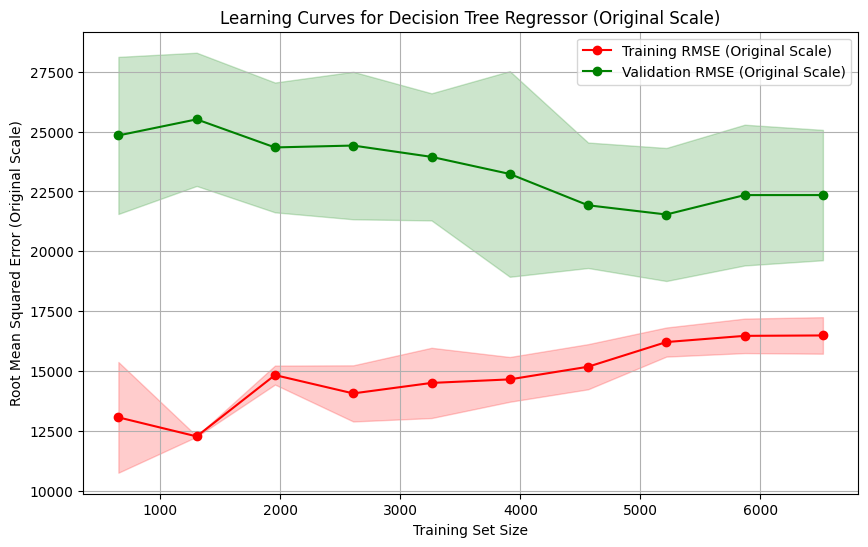

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


# Custom Scoring Function
# Define a custom scoring function to back-transform the predictions and calculate RMSE on the original scale
def rmse_original_scale(estimator, X, y):
    y_pred_log = estimator.predict(X)
    y_pred_original = np.expm1(y_pred_log)
    y_original = np.expm1(y)
    rmse = np.sqrt(mean_squared_error(y_original, y_pred_original))
    return rmse

# Learning Curve Calculation
# Generate the learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_dt, X, y, 
    cv=5,  # 5-fold cross-validation
    scoring=rmse_original_scale,  # Custom scoring function
    n_jobs=-1,  # Use all available cores for computation
    train_sizes=np.linspace(0.1, 1.0, 10)  # Generate learning curve points from 10% to 100% of the training data
)

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot Learning Curves
plt.figure(figsize=(10, 6))

# Plot the mean training error with standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training RMSE (Original Scale)', color='r', marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='r')

# Plot the mean validation error with standard deviation
plt.plot(train_sizes, test_scores_mean, label='Validation RMSE (Original Scale)', color='g', marker='o')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='g')

# Add labels and title to the plot
plt.ylabel('Root Mean Squared Error (Original Scale)')
plt.xlabel('Training Set Size')
plt.title('Learning Curves for Decision Tree Regressor (Original Scale)')
plt.legend()
plt.grid(True)
plt.show()


Learning curves were used to assess how training and validation scores changed with training set size. Although a gap between training and validation RMSE suggests potential overfitting, it may also reflect the inherent complexity and variability of the data. Given these factors, while performance could improve, the results are expected for this challenging task.


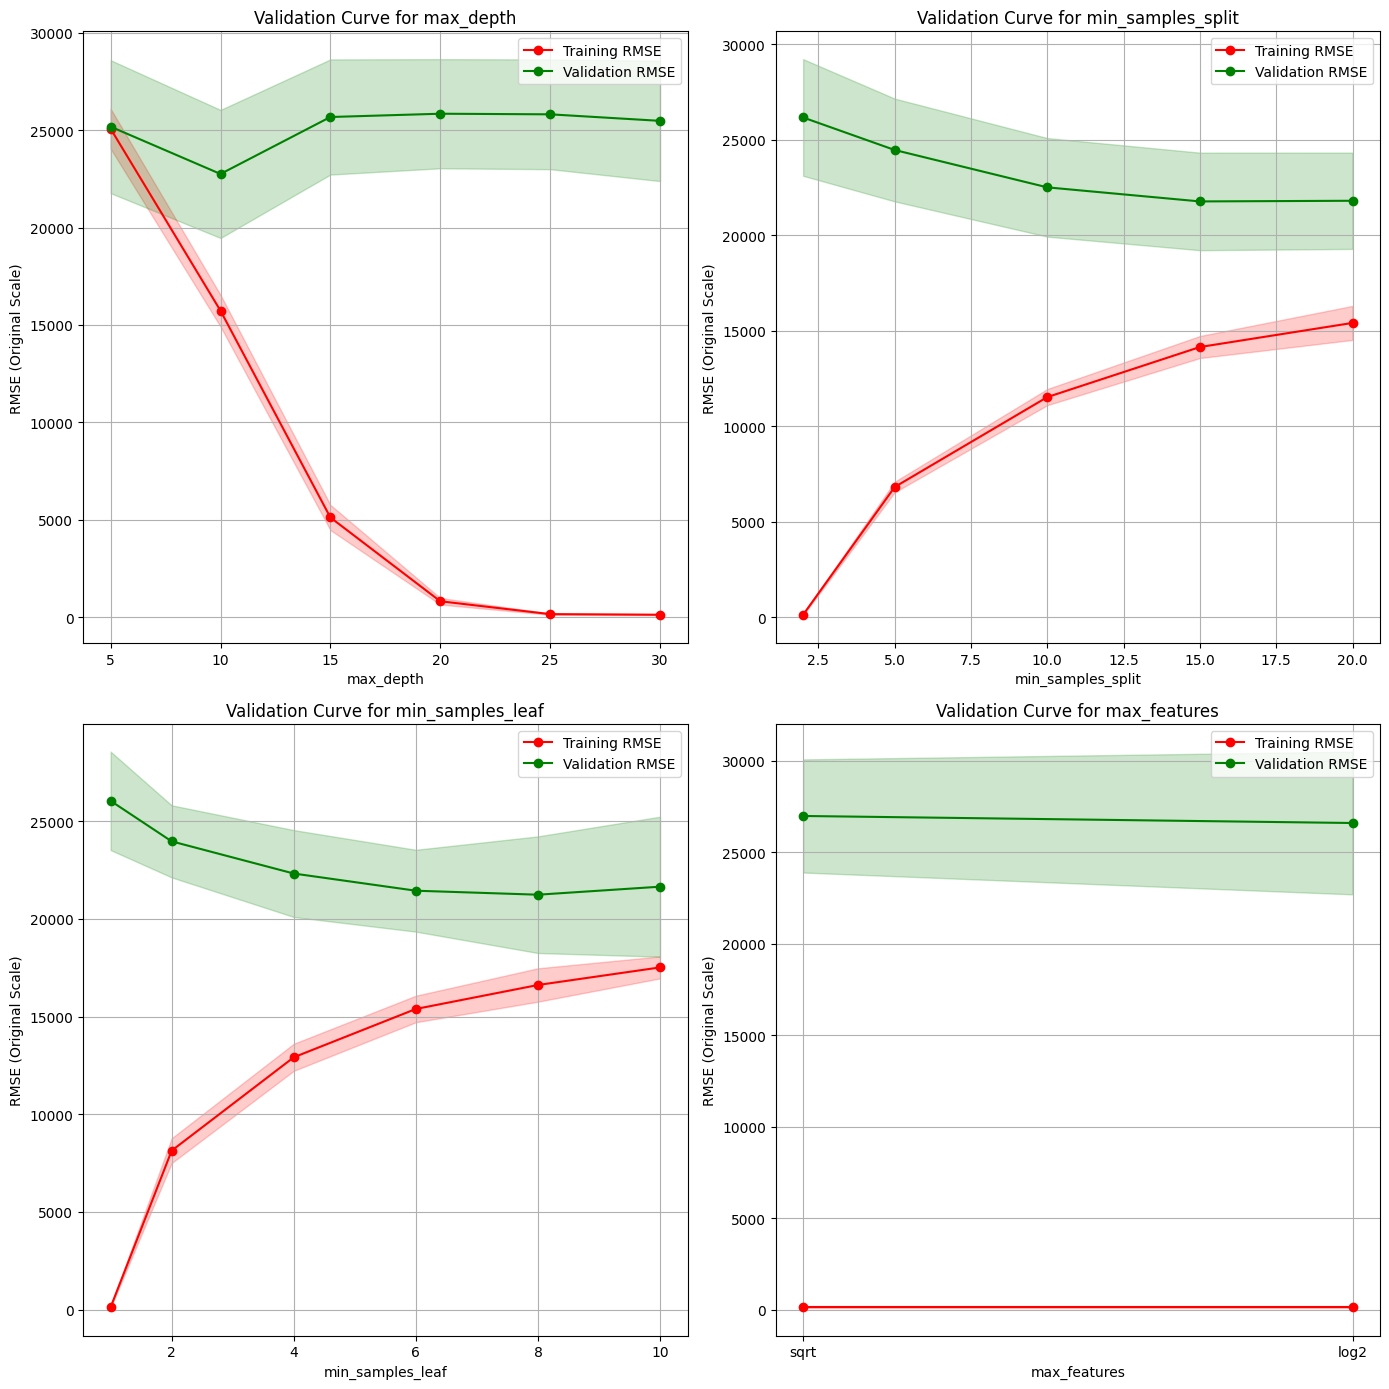

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define a custom scoring function to calculate RMSE on the original scale
def rmse_original_scale(estimator, X, y):
    y_pred_log = estimator.predict(X)
    y_pred_original = np.expm1(y_pred_log)
    y_original = np.expm1(y)
    rmse = np.sqrt(mean_squared_error(y_original, y_pred_original))
    return -rmse  # Negative RMSE because higher is better for scoring in validation_curve

# Parameters to evaluate
param_grid = {
    "max_depth": [0, 5, 10, 15, 20, 25, 30],  # Replace 'None' with 30
    "min_samples_split": [2, 5, 10, 15, 20],
    "min_samples_leaf": [1, 2, 4, 6, 8, 10],
    "max_features": ['auto', 'sqrt', 'log2']
}

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# Validation Curve for `max_depth`
param_range = param_grid["max_depth"]
train_scores, test_scores = validation_curve(
    DecisionTreeRegressor(), X, y, param_name="max_depth", param_range=param_range,
    cv=5, scoring=rmse_original_scale, n_jobs=-1
)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

axes[0, 0].plot(param_range, train_scores_mean, label='Training RMSE', color='r', marker='o')
axes[0, 0].fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                        alpha=0.2, color='r')
axes[0, 0].plot(param_range, test_scores_mean, label='Validation RMSE', color='g', marker='o')
axes[0, 0].fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='g')
axes[0, 0].set_title('Validation Curve for max_depth')
axes[0, 0].set_xlabel('max_depth')
axes[0, 0].set_ylabel('RMSE (Original Scale)')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Validation Curve for `min_samples_split`
param_range = param_grid["min_samples_split"]
train_scores, test_scores = validation_curve(
    DecisionTreeRegressor(), X, y, param_name="min_samples_split", param_range=param_range,
    cv=5, scoring=rmse_original_scale, n_jobs=-1
)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

axes[0, 1].plot(param_range, train_scores_mean, label='Training RMSE', color='r', marker='o')
axes[0, 1].fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                        alpha=0.2, color='r')
axes[0, 1].plot(param_range, test_scores_mean, label='Validation RMSE', color='g', marker='o')
axes[0, 1].fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                        alpha=0.2, color='g')
axes[0, 1].set_title('Validation Curve for min_samples_split')
axes[0, 1].set_xlabel('min_samples_split')
axes[0, 1].set_ylabel('RMSE (Original Scale)')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Validation Curve for `min_samples_leaf`
param_range = param_grid["min_samples_leaf"]
train_scores, test_scores = validation_curve(
    DecisionTreeRegressor(), X, y, param_name="min_samples_leaf", param_range=param_range,
    cv=5, scoring=rmse_original_scale, n_jobs=-1
)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

axes[1, 0].plot(param_range, train_scores_mean, label='Training RMSE', color='r', marker='o')
axes[1, 0].fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                        alpha=0.2, color='r')
axes[1, 0].plot(param_range, test_scores_mean, label='Validation RMSE', color='g', marker='o')
axes[1, 0].fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                        alpha=0.2, color='g')
axes[1, 0].set_title('Validation Curve for min_samples_leaf')
axes[1, 0].set_xlabel('min_samples_leaf')
axes[1, 0].set_ylabel('RMSE (Original Scale)')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Validation Curve for `max_features`
param_range = param_grid["max_features"]
train_scores, test_scores = validation_curve(
    DecisionTreeRegressor(), X, y, param_name="max_features", param_range=param_range,
    cv=5, scoring=rmse_original_scale, n_jobs=-1
)

# Compute the mean and standard deviation for each training size
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot on the last axis (1,1)
axes[1, 1].plot(param_range, train_scores_mean, label='Training RMSE', color='r', marker='o')
axes[1, 1].fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                        alpha=0.2, color='r')
axes[1, 1].plot(param_range, test_scores_mean, label='Validation RMSE', color='g', marker='o')
axes[1, 1].fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                        alpha=0.2, color='g')
axes[1, 1].set_title('Validation Curve for max_features')
axes[1, 1].set_xlabel('max_features')
axes[1, 1].set_ylabel('RMSE (Original Scale)')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


                                Table 6. Hyperparameter tuning
| Hyper parameter    | Training RMSE Trend                                                                  | Validation RMSE Trend                                                                            | Insights                                                                                                       |
| ---------------------------------------------- | ------------------------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------ | -------------------------------------------------------------------------------------------------------------- |
| Max Depth         | Decreases significantly as max depth increases, reaching near zero at higher depths. | Decreases initially, then stabilizes, indicating overfitting at higher depths.                   | Increasing max depth reduces training error but leads to overfitting as validation error stabilizes.           |
| Min Samples Split | Increases as min samples split increases, indicating less complex models.            | Remains relatively stable with a slight increase, indicating minimal impact on validation error. | Higher min samples split values lead to simpler models with higher training error but stable validation error. |
| Min Samples Leaf  | Increases as min samples leaf increases, indicating less complex models.             | Remains relatively stable with a slight increase, indicating minimal impact on validation error. | Higher min samples leaf values lead to simpler models with higher training error but stable validation error.  |
| Max Features      | Remains constant, indicating no significant impact on training error.                | Remains relatively stable, indicating minimal impact on validation error.                        | Changing max features does not significantly affect the model's performance.                                   |             | Remains relatively stable, indicating minimal impact on validation error.                        | Changing max features does not significantly affect the model's performance.                                   |


This table provides specific insights derived from each validation curve, helping to understand how different hyperparameters impact the model's performance.


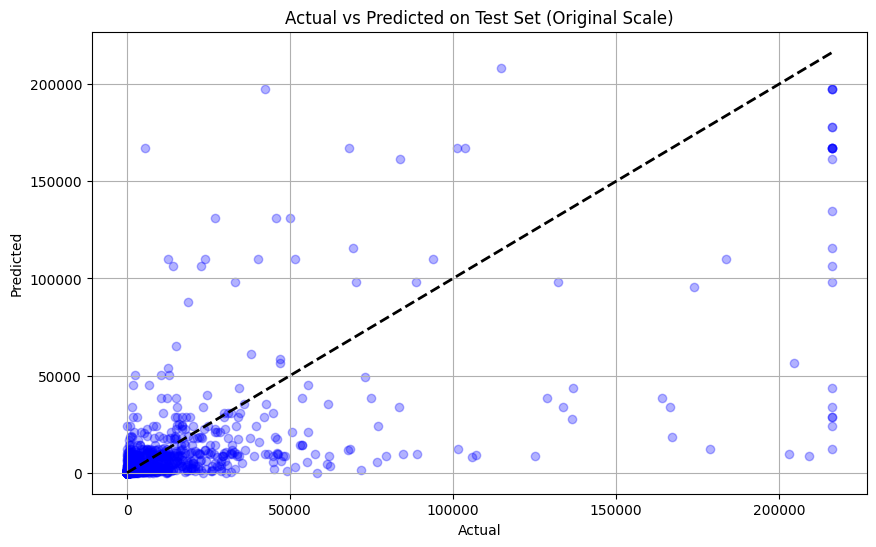

In [41]:
import matplotlib.pyplot as plt

# Assuming y_test_original and y_test_pred_original are already defined from your previous code cell

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_test_pred_original, alpha=0.3, color='blue')
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted on Test Set (Original Scale)')
plt.grid(True)
plt.show()


Predicted vs. Actual Scatter Plot: This scatter plot compared the actual number of students enrolled (x-axis) to the predicted number of students enrolled (y-axis), providing a visual representation of prediction accuracy.

The scatter plot shows that the model generally predicts well for courses with lower enrollments, but tends to underpredict for courses with higher actual enrollments. The spread of points indicates that there are larger errors for courses with a high number of enrollments, reflecting the model's difficulty in capturing high variability.


##### Random Forest


### Cross-Validation Results ###

Training R² Scores (Log Scale):
  Individual Scores: [0.9567275979526518, 0.9545127701983515, 0.954469130637433, 0.9573093596061714, 0.9552569151565852]
  Mean Training R²: 0.9557 ± 0.0012

Test R² Scores (Log Scale):
  Individual Scores: [0.6656996174071502, 0.6940993006443086, 0.6986339791167677, 0.6558350339206039, 0.6967546921162122]
  Mean Test R²: 0.6822 ± 0.0178

Training RMSE Scores (Log Scale):
  Individual Scores: [0.5525609157089544, 0.5663261795666649, 0.5676190563533752, 0.5509733602029285, 0.5599356944893031]
  Mean Training RMSE (Log Scale): 0.5595 ± 0.0068

Test RMSE Scores (Log Scale):
  Individual Scores: [1.5383477793446856, 1.473680454417544, 1.44988798256613, 1.5352372680059245, 1.4851238482498434]
  Mean Test RMSE (Log Scale): 1.4965 ± 0.0349

Training RMSE Scores (Original Scale):
  Individual Scores: [11243.481222211696, 11314.272711117801, 11330.680824386829, 10941.977942511003, 11307.767195150742]
  Mean Training RMSE (Origin

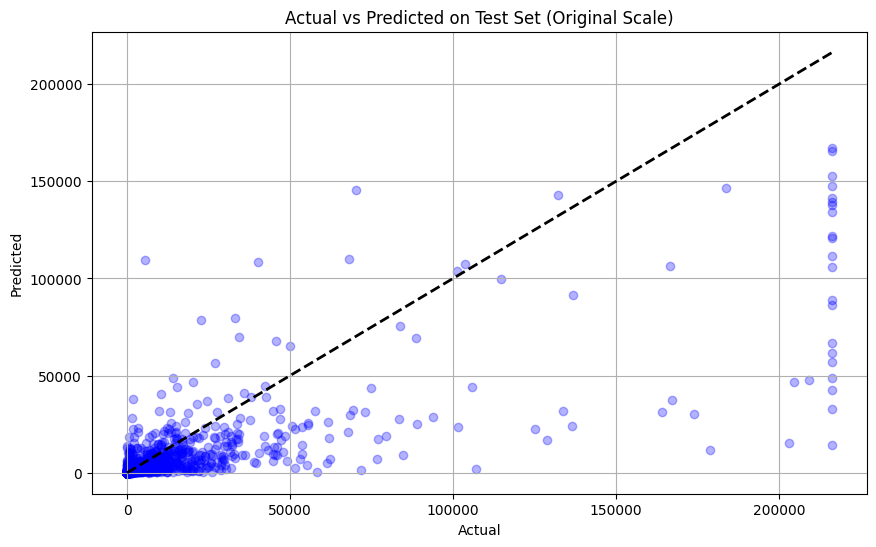

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Data Preparation
X = df_ml.drop(columns=['course-enrolled-student_capped_and_logged'])
y = df_ml['course-enrolled-student_capped_and_logged']

# Optimize Train-Test Split using K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics
train_r2_list, test_r2_list = [], []
train_rmse_log_list, test_rmse_log_list = [], []
train_rmse_original_list, test_rmse_original_list = [], []
r2_original_test_list = []

# Define fixed hyperparameters for RandomForestRegressor
rf_regressor = RandomForestRegressor(
 random_state=42
)

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    rf_regressor.fit(X_train, y_train)

    # Predictions
    y_train_pred = rf_regressor.predict(X_train)
    y_test_pred = rf_regressor.predict(X_test)

    # Evaluate the model (R² and RMSE on log scale)
    train_r2 = rf_regressor.score(X_train, y_train)
    test_r2 = rf_regressor.score(X_test, y_test)
    train_rmse_log = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse_log = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Reverse log1p transformation for predictions and actual values
    y_train_pred_original = np.expm1(y_train_pred)
    y_test_pred_original = np.expm1(y_test_pred)
    y_train_original = np.expm1(y_train)
    y_test_original = np.expm1(y_test)

    # Compute RMSE and R² on the original scale
    train_rmse_original = np.sqrt(mean_squared_error(y_train_original, y_train_pred_original))
    test_rmse_original = np.sqrt(mean_squared_error(y_test_original, y_test_pred_original))
    r2_original_test = r2_score(y_test_original, y_test_pred_original)

    # Append metrics to lists
    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)
    train_rmse_log_list.append(train_rmse_log)
    test_rmse_log_list.append(test_rmse_log)
    train_rmse_original_list.append(train_rmse_original)
    test_rmse_original_list.append(test_rmse_original)
    r2_original_test_list.append(r2_original_test)

# Calculate average metrics over all folds
avg_train_r2 = np.mean(train_r2_list)
avg_test_r2 = np.mean(test_r2_list)
avg_train_rmse_log = np.mean(train_rmse_log_list)
avg_test_rmse_log = np.mean(test_rmse_log_list)
avg_train_rmse_original = np.mean(train_rmse_original_list)
avg_test_rmse_original = np.mean(test_rmse_original_list)
avg_r2_original_test = np.mean(r2_original_test_list)

# Output results with improved formatting
print("\n### Cross-Validation Results ###\n")

print("Training R² Scores (Log Scale):")
print(f"  Individual Scores: {train_r2_list}")
print(f"  Mean Training R²: {avg_train_r2:.4f} ± {np.std(train_r2_list):.4f}")

print("\nTest R² Scores (Log Scale):")
print(f"  Individual Scores: {test_r2_list}")
print(f"  Mean Test R²: {avg_test_r2:.4f} ± {np.std(test_r2_list):.4f}")

print("\nTraining RMSE Scores (Log Scale):")
print(f"  Individual Scores: {train_rmse_log_list}")
print(f"  Mean Training RMSE (Log Scale): {avg_train_rmse_log:.4f} ± {np.std(train_rmse_log_list):.4f}")

print("\nTest RMSE Scores (Log Scale):")
print(f"  Individual Scores: {test_rmse_log_list}")
print(f"  Mean Test RMSE (Log Scale): {avg_test_rmse_log:.4f} ± {np.std(test_rmse_log_list):.4f}")

print("\nTraining RMSE Scores (Original Scale):")
print(f"  Individual Scores: {train_rmse_original_list}")
print(f"  Mean Training RMSE (Original Scale): {avg_train_rmse_original:.4f} ± {np.std(train_rmse_original_list):.4f}")

print("\nTest RMSE Scores (Original Scale):")
print(f"  Individual Scores: {test_rmse_original_list}")
print(f"  Mean Test RMSE (Original Scale): {avg_test_rmse_original:.4f} ± {np.std(test_rmse_original_list):.4f}")

print(f"\nMean Test R² on Original Scale: {avg_r2_original_test:.4f} ± {np.std(r2_original_test_list):.4f}\n")

# Step 5: Baseline Comparison
mean_baseline_train_original = np.mean(np.expm1(y_train))  # Back-transform log1p
median_baseline_train_original = np.median(np.expm1(y_train))  # Back-transform log1p

mean_baseline_test_original = np.mean(np.expm1(y_test))  # Back-transform log1p
median_baseline_test_original = np.median(np.expm1(y_test))  # Back-transform log1p

y_mean_pred_test = np.full_like(y_test, mean_baseline_test_original)  # Predict the mean for all test samples
y_median_pred_test = np.full_like(y_test, median_baseline_test_original)  # Predict the median for all test samples

mean_mse_test_original = mean_squared_error(y_test_original, y_mean_pred_test)
median_mse_test_original = mean_squared_error(y_test_original, y_median_pred_test)

mean_rmse_test_original = np.sqrt(mean_mse_test_original)  # RMSE for mean baseline on test data
median_rmse_test_original = np.sqrt(median_mse_test_original)  # RMSE for median baseline on test data

mean_r2_test_original = r2_score(y_test_original, y_mean_pred_test)
median_r2_test_original = r2_score(y_test_original, y_median_pred_test)

print("\n### Baseline Comparison on Test Set (Original Scale) ###\n")
print(f"Mean Baseline (Test, Original Scale) - RMSE: {mean_rmse_test_original:.2f}, R²: {mean_r2_test_original:.4f}")
print(f"Median Baseline (Test, Original Scale) - RMSE: {median_rmse_test_original:.2f}, R²: {median_r2_test_original:.4f}")

# Scatter Plot for Model Predictions vs Actuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_test_pred_original, alpha=0.3, color='blue')
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted on Test Set (Original Scale)')
plt.grid(True)
plt.show()


The scatter plot for the Random Forest model shows improved alignment with the actual values for lower enrollment courses, compared to the Decision Tree. However, like the Decision Tree, it still struggles with higher enrollments, though the variance in predictions is generally smaller, indicating better generalization and stability.

## Limitation

The dataset may be biased due to missing values excluded during data cleaning, caused by network errors and challenges in capturing JavaScript-rendered content. For instance, missing course-price data likely excluded free courses, skewing the dataset toward paid offerings. This cleaning reduced the dataset size from 19,425 to 8,148 observations, diminishing diversity and completeness. The smaller dataset increases the risk of overfitting as it is less likely to reflect the population, leading to the generalization problem accurately (Charilaou and Battat, 2022).

The dataset may also introduce potential bias due to omitted variables, resulting in biased and inconsistent estimates (Wikipedia, 2020). Some potentially impactful variables, such as course ranking and elapsed time since launch were not included in the dataset and model. These key feature omissions could cause misattribution of effects and skew predictions (Feigenberg, Ost and Qureshi, 2023). These omissions limit the model's ability to capture the complex factors influencing student decisions, potentially reducing its generalizability.

# Conclusion and Business Recommendations

## Business Recommendations
By leveraging this machine learning model, Udemy can create a webpage for instructors to estimate the success of an unpublished course and experiment with factors (such as pricing) to boost course performance. This would function like Facebook’s ad publishing page, which provides impression estimates based on the duration and cost of advertising. Instructors can select features of the course they intend to publish, such as the course price, duration, topic, and others. The model then combines this information with pre-existing instructor data to estimate student enrollment. Instructors could further use this model to test out permutations for successful courses and modify features to optimise student enrolment. As a result, instructors would feel more confident in publishing courses, fostering platform growth.


## Next Steps
Since this model is restricted to courses in computer science and business analytics, moving forward, other courses on the platform can also be used to train the model further and expand the business-use case.

To address the limitations highlighted in section 4.2, using statistical methods to impute missing values and enhancing web scraping techniques for JavaScript-rendered content can help improve data quality. 

Additionally, including other variables (such as course rank or launch time) and interaction terms can provide crucial information for forecasts, prevent omitted variable bias and capture more nuanced relationships between variables. These would enhance the predictive accuracy of the model.


## Conclusion
Out of the various machine learning models explored in this report, the random forest model with cross-validation is the optimal model to estimate student enrollment in Udemy’s courses. This model uses information on the course and instructor to predict the course's success. Udemy can use this model to provide instructors with tailored estimates and insights, helping refine course features and parameters (such as price or duration) before launch.

While useful, this model still has limitations, which can be addressed by incorporating advanced web scraping, additional predictors and interaction terms. The dataset must also be expanded to include all available courses on Udemy. Nevertheless, Udemy can utilise this model to create a more transparent and encouraging environment for instructors, fostering growth on the platform and optimising revenue.


# References


Charilaou, P. and Battat, R. (2022). Machine learning models and over-fitting considerations. World Journal of Gastroenterology, 28(5), pp.605–607. doi:https://doi.org/10.3748/wjg.v28.i5.605.

Feigenberg, B., Ost, B. and Qureshi, J.A. (2023). Omitted Variable Bias in Interacted Models: A Cautionary Tale. Review of Economics and Statistics, [online] pp.1–47. doi:https://doi.org/10.1162/rest_a_01361.

Wikipedia. (2020). Omitted-variable bias. [online] Available at: https://en.wikipedia.org/wiki/Omitted-variable_bias.

Murel, J. and Kavlakoglu, E. (2024). Dimensionality Reduction. [online] Ibm.com. Available at: https://www.ibm.com/topics/dimensionality-reduction?utm [Accessed 7 Dec. 2024].

Webscraper.io. (2019). Web Scraper - The #1 web scraping extension. [online] Available at: https://webscraper.io/.

# Appendices

## Gen-AI Usage

This machine learning project is supported by generative AI in four areas.
Generative AI was a valuable tool in our machine learning project, particularly in areas not extensively covered in class, such as encoding categorical variables, using regex for data cleaning, and exploring advanced models like XGBoost. It allowed us to efficiently tackle complex tasks that would have otherwise required significant time to research and implement. Additionally, GenAI was very useful in debugging, helping us quickly identify and resolve errors in our code. However, we also learned that effectively using AI requires crafting clear and specific prompts. The quality of its suggestions often depended on how well we articulated our queries. This prompted us to think critically and refine our prompts, turning the interaction into a learning process in itself. Overall, AI improved our efficiency while also fostering active learning.





| Area                | Generative AI Contribution                                                              | Implementation                                                                               |
| ------------------- | --------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------- |
| Data cleaning       | Suggested code for resolving inconsistencies among the variables and handling outliers. | Utilized the suggestion to make a more comprehensive function to handle outliers.            |
| Feature engineering | Guided the techniques of encoding categorical variables.                                | Evaluated and implemented the appropriate encodings for multiple categorical variables.      |
| Model selection     | Generative AI helped in comparing the models and suggesting the best-performing one.    | Analysed metrics accordingly and selected the final model that meets the project objectives. |
| Code readability    | Provided suggestions for structuring, naming, and documenting code to improve clarity.  | Applied and tailored suggestions to maintain readable and reproducible code blocks.          |

## Attribution Contribution

Ruhani Sehgal was an active group member who often shared ideas and proactively problem-solved. She contributed to the project by handling outliers, conducting exploratory data analysis, and feature engineering for assigned variables (course-total-hour-length, instructor-rating, and course-language). She also explored several machine learning models, such as ridge and lasso regressions and XGBoost. For the markdown cells, she worked on outlier analysis, business recommendations, next steps, and the conclusion. Finally, she took the initiative to manage the Trello board and kept a record of the project progress.

Jiayi He contributed to the project by extracting and cleaning instructor ratings, course ratings, and reviews, removing outliers, and exploring their correlation with student enrollments. Jiayi also classified course topics into categories, ensure proper encoding for multiple-category courses. Jiayi trained regression and random forest models with RFE for feature selection, documented explanations for feature engineering, correlation studies, feature selection, limitation and organized other models for the appendices. 

Azizah Din contributed to the machine learning project by extracting and cleaning the instructor courses, instructor students, course price, and number of lectures. She also handled the outliers, created the figures for data visualization, made a regression model using selected features with high correlation, and trained a decision tree cross validation model with hyperparameter tuning. Azizah also worked on the explanation for problem statement, objective, descriptive analytics, and generative AI reflections.

Pratham played a crucial role in the project by designing a web scraper to collect data and leading the cleaning and feature engineering efforts, including handling outliers for course-enrolled-student and course-instructional-level. Pratham trained machine learning models, such as decision trees and random forests, and contributed to model evaluation through learning curves, validation curves, and actual vs. predicted plots. Pratham also performed cross-validation and grid search to optimize model performance. Additionally, Pratham documented the data preparation and model sections, refactored code for efficiency, and provided valuable insights in group discussions, applying critical thinking and technical knowledge to improve the overall project.



## Trello Images

Please find the link to Trello here: https://trello.com/b/36qxVnAP/programming-for-ba

The first screenshot shows how the team started with the project in late October. The first tasks were related to setting up the Trello board and finding a dataset for the model. The team decided to use web scraping on Udemy’s website and presented the project idea and outline to our assigned TA.

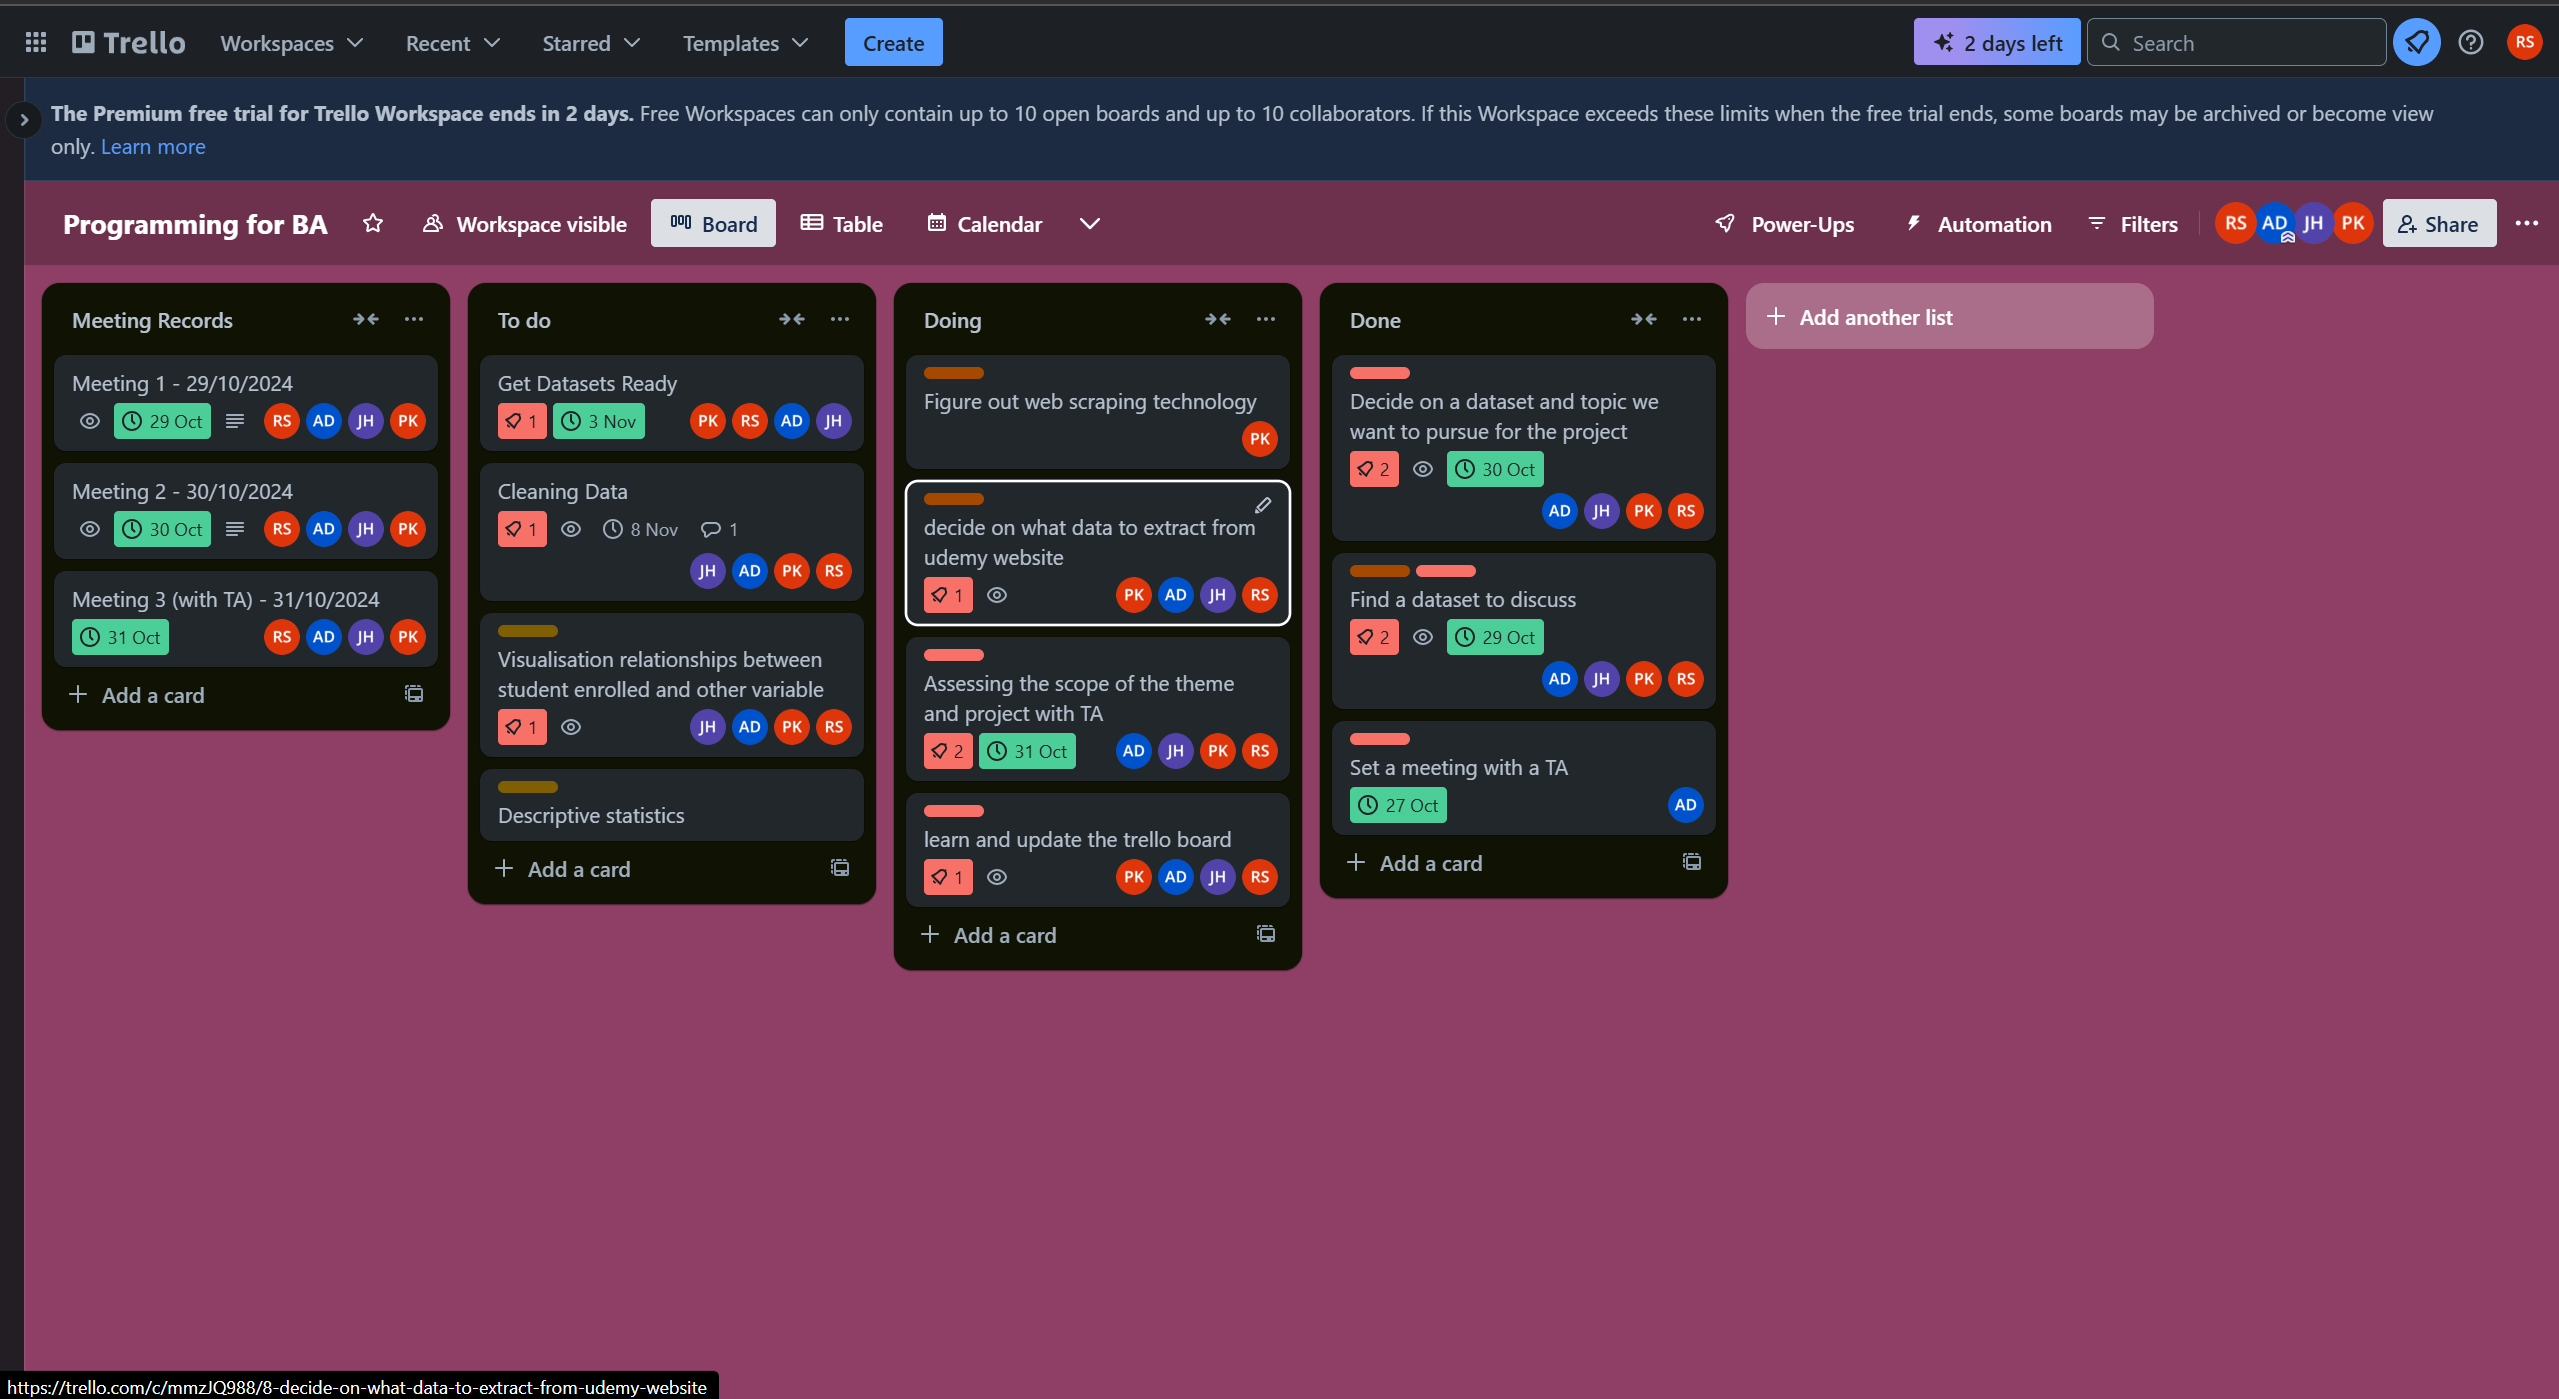

In [43]:
from IPython.display import Image, display

# Display Screenshot 1
display(Image(filename="trello_images/Trello Screenshot 1.png"))

The second screenshot shows the data cleaning, handling outliers, exploratory data analysis, feature engineering and additional data scraping work done. Each team member was assigned certain variables to work on and analyse. Further meetings were held to discuss our findings, update our assigned TA on the progress and ask for any required support. Towards mid-November, the team began looking at different machine learning models and planned to discuss findings in a week.


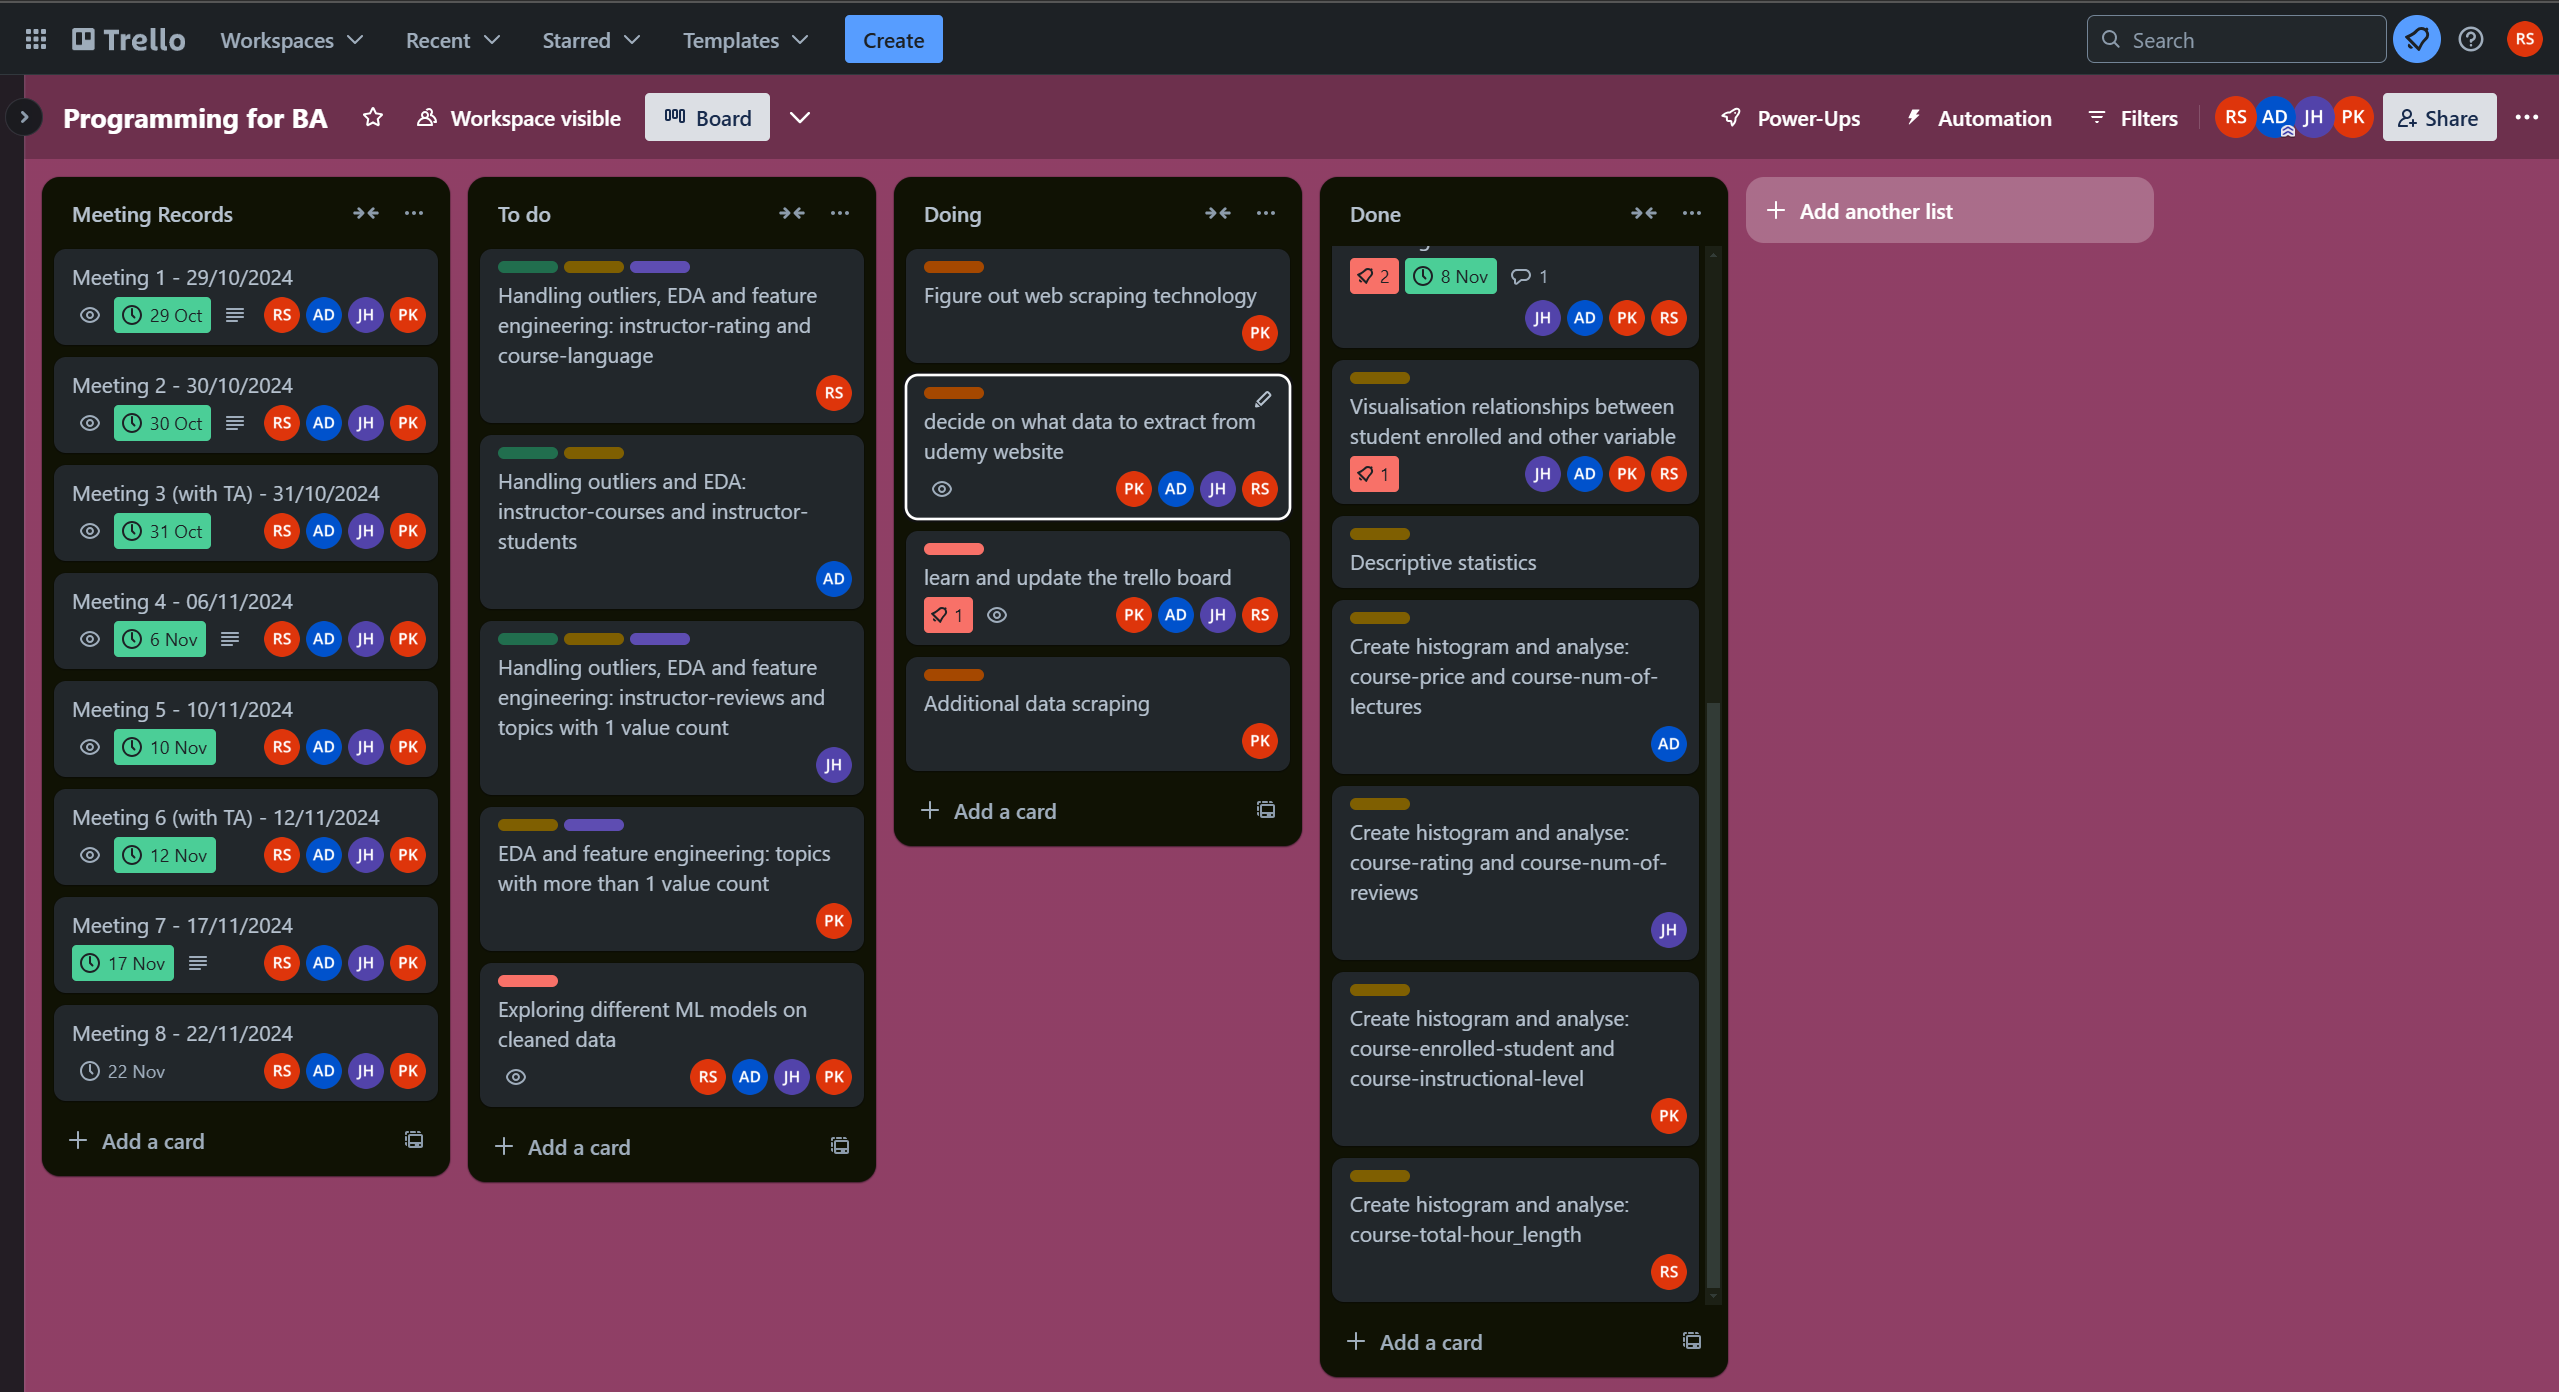

In [44]:
# Display Screenshot 2
display(Image(filename="trello_images/Trello Screenshot 2.png"))

The third iteration of our Trello board shows another meeting with the TA to share our machine learning model results and discuss the next steps (starting on the Markdown portion of the project). Each team member was assigned a written part (with corresponding word counts) to complete. Some additional tasks were identified to organise the Python notebook.

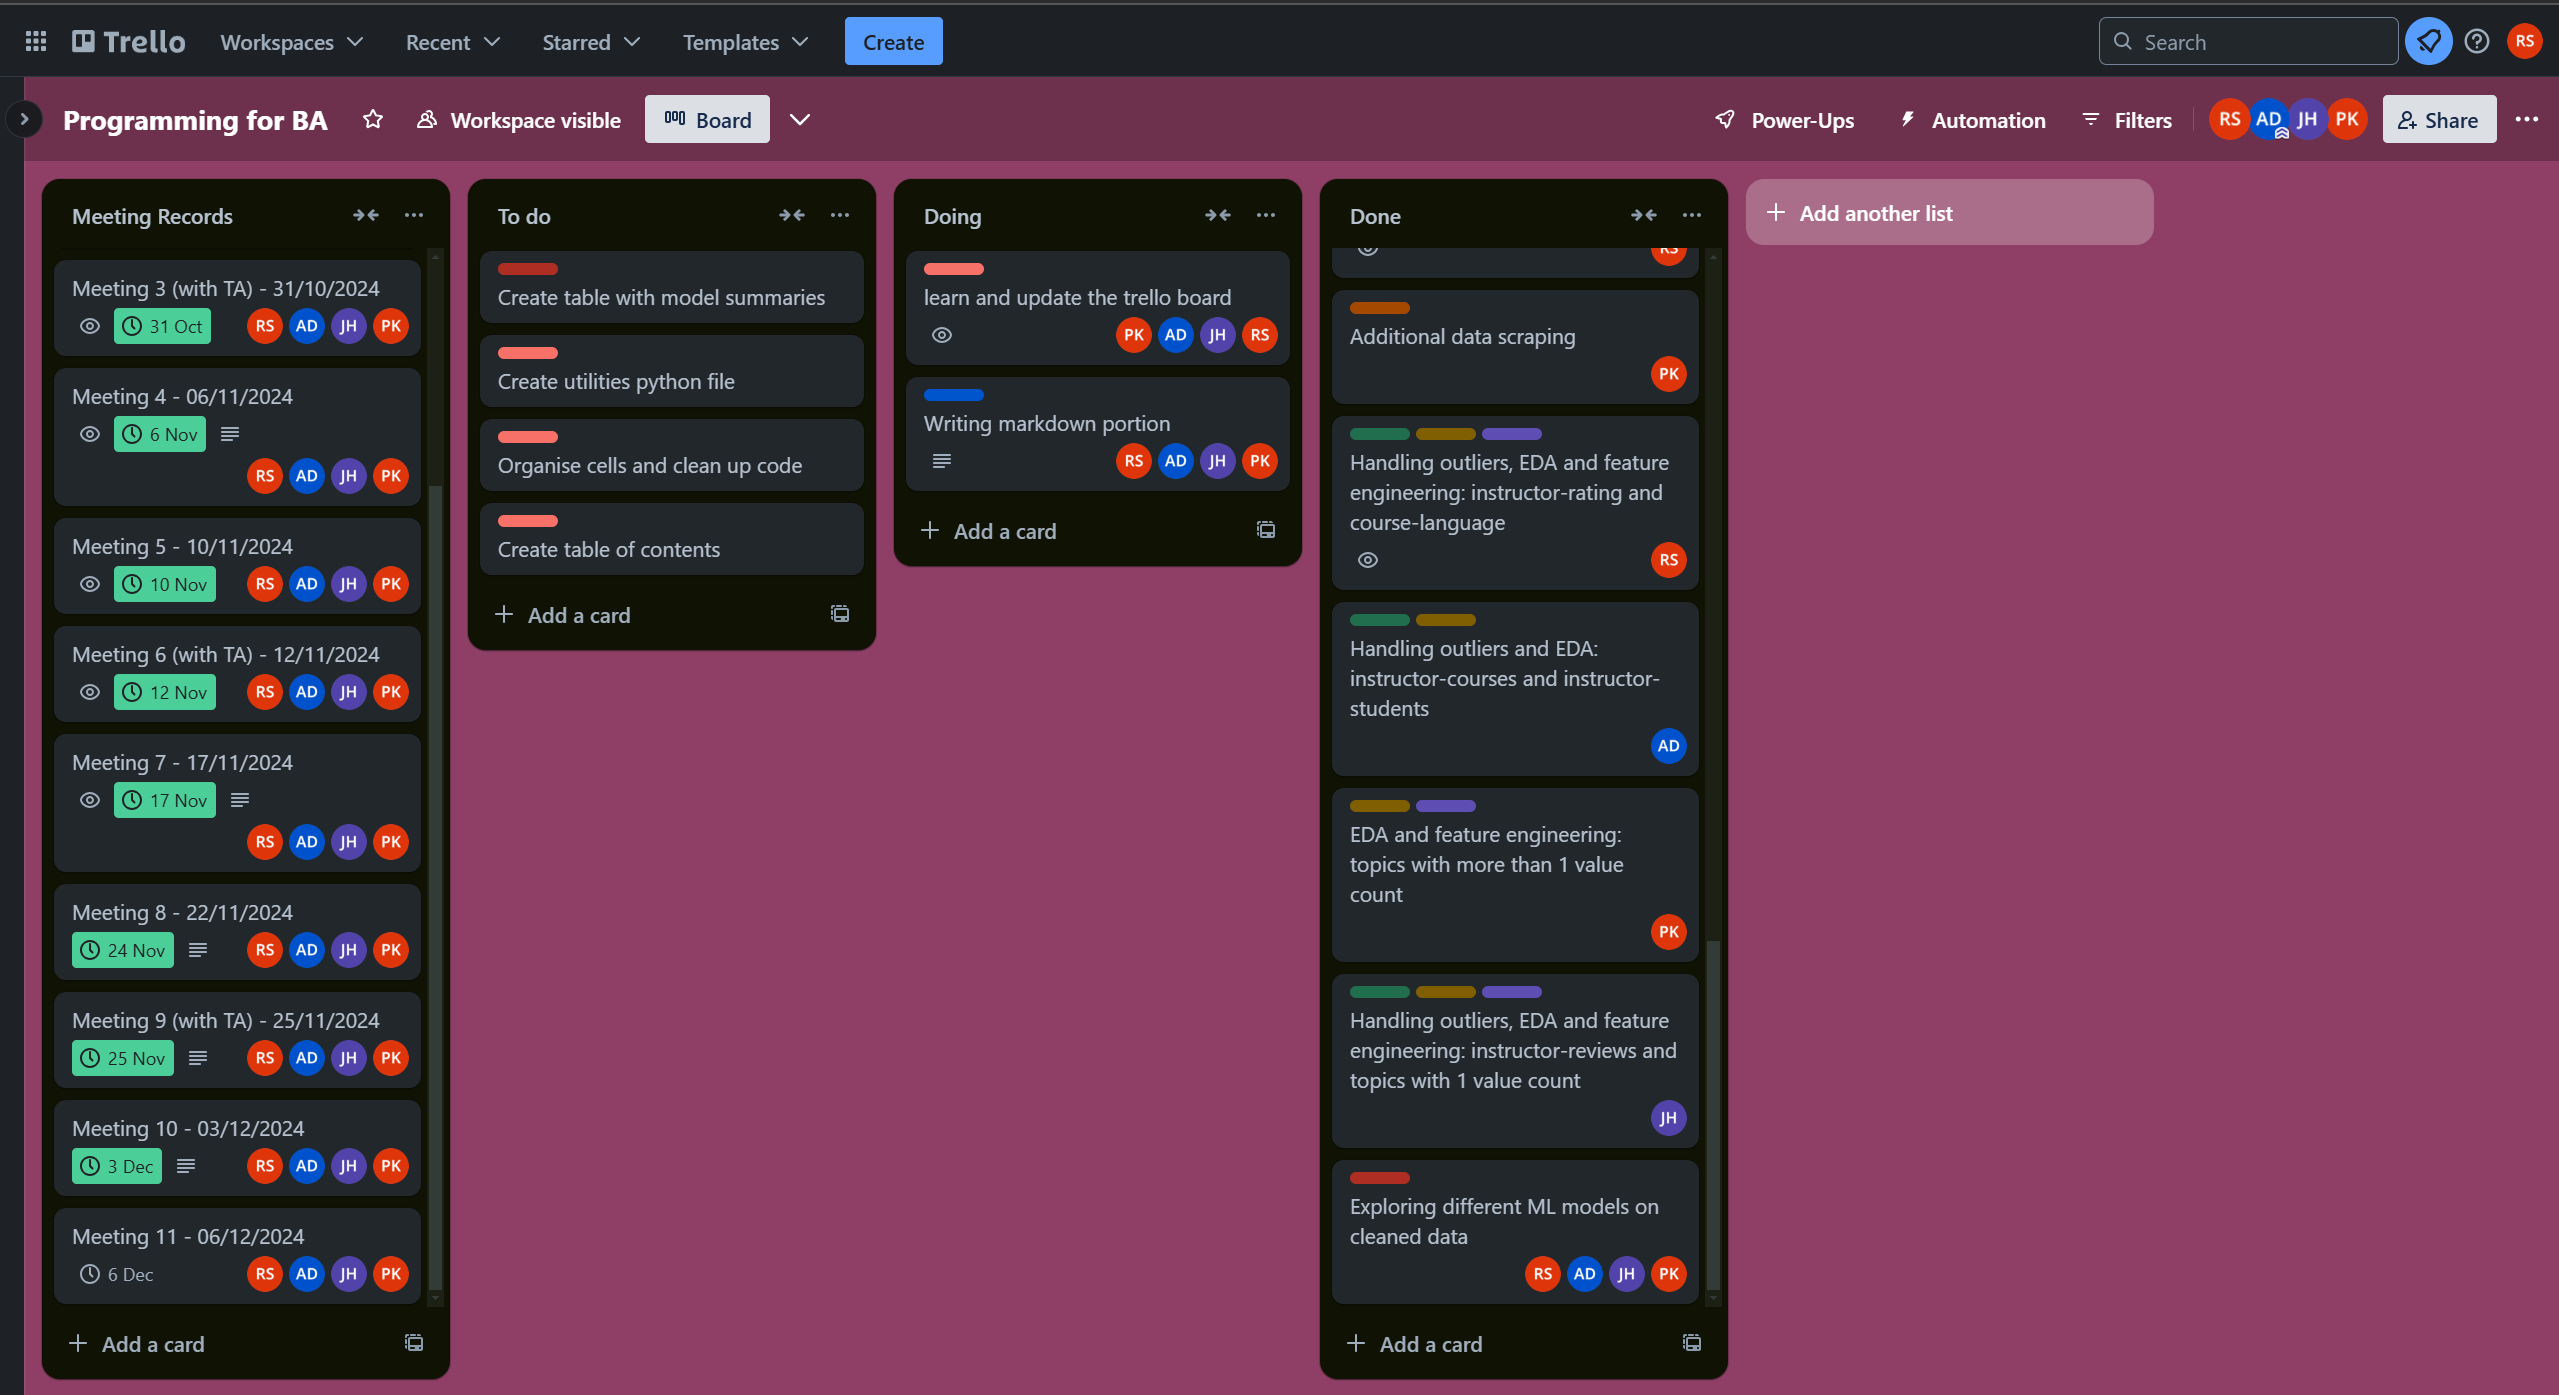

In [45]:
# Display Screenshot 3
display(Image(filename="trello_images/Trello Screenshot 3.png"))

## Other Models

In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
!pip install xgboost # Ensure xgboost is installed
import xgboost as xgb  


#### Linear Regression, Ridge Regression, Lasso Regression, Random Forest, XGBoots with all features

In [47]:
# DataFrame: df_ml
# Target: 'course-enrolled-student_capp_log'

# Split data into features (X) and target (y)
X = df_ml.drop(columns=['course-enrolled-student_capped_and_logged'])
y = df_ml['course-enrolled-student_capped_and_logged']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'R2': r2}
    print(f"{name}: MSE = {mse:.4f}, R2 = {r2:.4f}")

Linear Regression: MSE = 2.9720, R2 = 0.5802
Ridge Regression: MSE = 2.9721, R2 = 0.5802
Lasso Regression: MSE = 3.0516, R2 = 0.5689
Random Forest: MSE = 2.3503, R2 = 0.6680
XGBoost: MSE = 2.4896, R2 = 0.6483


#### SVR

In [48]:
# DataFrame: df_ml
# Target: 'course-enrolled-student_log'

# Split data into features (X) and target (y)
X = df_ml.drop(columns=['course-enrolled-student_capped_and_logged'])
y = df_ml['course-enrolled-student_capped_and_logged']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVR model
print("Training Support Vector Regressor...")
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# Make predictions
y_pred = svr.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"SVR - R^2: {r2:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

# Reverse log1p transformation for predictions and actual values
y_pred_original = np.expm1(y_pred)  # Apply expm1 to predictions
y_test_original = np.expm1(y_test)  # Apply expm1 to true values

# Compute R^2 and RMSE on the original scale
mse_original = mean_squared_error(y_test_original, y_pred_original)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_test_original, y_pred_original)

print(f"R^2 on Original Scale: {r2_original:.4f}")
print(f"RMSE on Original Scale: {rmse_original:.4f}")


Training Support Vector Regressor...
SVR - R^2: 0.5882, MSE: 2.9154, RMSE: 1.7075
R^2 on Original Scale: 0.0686
RMSE on Original Scale: 24319.3662


#### Random forest with RFE


Selected Features (RFE with Random Forest):
Index(['course-price_capped_and_logged',
       'instructor-reviews_capped_and_logged',
       'instructor-courses_capped_and_logged',
       'instructor-students_capped_and_logged',
       'course-num-of-lectures_capped_and_logged'],
      dtype='object')

Random Forest Model Evaluation with Selected Features:
Training Data:
Mean Squared Error: 0.3237
R-squared: 0.9541

Test Data:
Mean Squared Error: 2.4887
R-squared: 0.6484

Feature Importances from Random Forest (Selected Features):
                                    Feature  Importance
3     instructor-students_capped_and_logged        0.55
2      instructor-courses_capped_and_logged        0.16
1      instructor-reviews_capped_and_logged        0.11
4  course-num-of-lectures_capped_and_logged        0.10
0            course-price_capped_and_logged        0.09


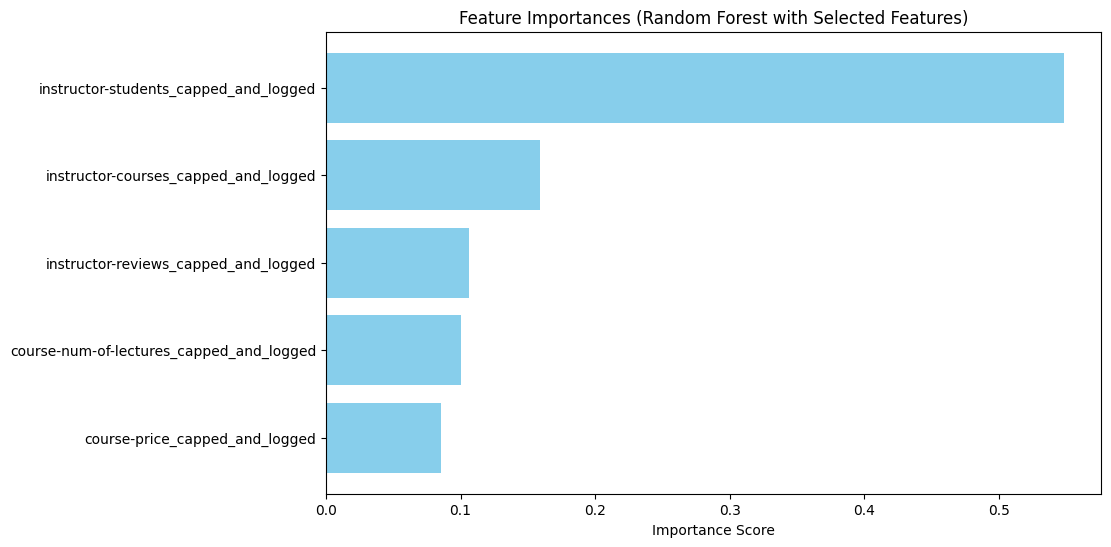

In [49]:
# Assuming X_train, X_test, y_train, and y_test are defined and X_train is a Pandas DataFrame

# Step 1: Initialize the Random Forest Regressor for RFE
# RandomForestRegressor is used as the base model for Recursive Feature Elimination (RFE)
rf_for_rfe = RandomForestRegressor(
    n_estimators=50,  # Use fewer trees for faster feature selection
    random_state=42,
    n_jobs=-1         # Use all available CPU cores
)

# Step 2: Use RFE for Feature Selection (e.g., select top 5 features)
rfe = RFE(estimator=rf_for_rfe, n_features_to_select=5)
rfe.fit(X_train, y_train)  # Fit RFE to the training data

# Step 3: Get the selected features
# Ensure X_train is a DataFrame to access column names
selected_features = X_train.columns[rfe.support_]  # Mask to get selected feature names

print("\nSelected Features (RFE with Random Forest):")
print(selected_features)

# Step 4: Filter X_train and X_test to include only selected features
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

# Step 5: Train Random Forest Model with Selected Features
# Initialize a new Random Forest Regressor for final training
rf_model = RandomForestRegressor(
    n_estimators=5000,  # Use more trees for better accuracy
    max_depth=None,     # No maximum depth
    random_state=42,
    n_jobs=-1           # Use all available CPU cores
)
rf_model.fit(X_train_rfe, y_train)  # Train the model on the reduced dataset

# Step 6: Make Predictions
# Predict on both training and test datasets
y_train_pred = rf_model.predict(X_train_rfe)
y_test_pred = rf_model.predict(X_test_rfe)

# Step 7: Evaluate the Model
# Calculate Mean Squared Error (MSE) and R-squared (R²) for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate MSE and R² for test data
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print("\nRandom Forest Model Evaluation with Selected Features:")
print("Training Data:")
print(f"Mean Squared Error: {train_mse:.4f}")
print(f"R-squared: {train_r2:.4f}")

print("\nTest Data:")
print(f"Mean Squared Error: {test_mse:.4f}")
print(f"R-squared: {test_r2:.4f}")

# Step 8: Feature Importances from the Final Model
# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({
    'Feature': selected_features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances from Random Forest (Selected Features):")
print(feature_importances)

# Step 9: Plot Feature Importances
# Visualize feature importances with a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features on top
plt.title('Feature Importances (Random Forest with Selected Features)')
plt.xlabel('Importance Score')
plt.show()